# Projet : Anticipez les besoins en consommation électrique de bâtiments

## Objectif :

- Seattle, ville neutre en émissions de carbone en 2050
- émissions des bâtiments non destinés à l’habitation
- Comprendre du mieux possible nos données
- Prédictions des émissions de CO2 et de la consommation totale d’énergie

# 1. Analyse de la forme des données :

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_row', 100)
pd.set_option('display.max_column', 99)


# 2015

In [4]:
data_2015 = pd.read_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P4_OC\P4_Donnees\2015_Building_Energy_Benchmarking.csv", sep=",")

In [5]:
df_2015 = data_2015.copy()

In [6]:
df_2015.shape

(3340, 42)

In [7]:
df_2015.dtypes.value_counts()

float64    19
object     15
int64       8
dtype: int64

In [8]:
df_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier
0,21548,2015,Multifamily LR (1-4),Low-Rise Multifamily,PUGET VISTA APTS,1992200030,"411 W REPUBLICAN ST\nSEATTLE, WA 98119\n(47.62...",7,MAGNOLIA / QUEEN ANNE,1967,1,4.0,40086,6133,33953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not Compliant,NaN
1,26379,2015,NonResidential,Hotel,GEORGETOWN INN,6920700025,"6100 CORSON AVE S\nSEATTLE, WA 98108\n(47.5477...",2,GREATER DUWAMISH,1992,1,3.0,22452,0,22452,Hotel,Hotel,22452.0,NaN,NaN,NaN,NaN,NaN,78.0,60.3,61.5,118.2,122.0,1354219.0,1381137.0,0.0,172881.0,589893.0,7644.0,764350.0,0.0,44.71,1.88,No,NaN,Compliant,NaN
2,26713,2015,Multifamily HR (10+),High-Rise Multifamily,QUINTESSA APTS,5247800955,"201 YESLER WAY\nSEATTLE, WA 98104\n(47.6015502...",7,DOWNTOWN,2007,1,13.0,90959,0,90959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,48.0,52.2,115.4,126.2,4361755.0,4748161.0,0.0,829363.0,2829904.0,15320.0,1531968.0,0.0,101.09,0.98,No,NaN,Compliant,NaN
3,102,2015,NonResidential,Hotel,MARRIOTT RESIDENCE INN,1984200065,"800 FAIRVIEW AVE N\nSEATTLE, WA 98109\n(47.626...",3,LAKE UNION,1990,1,7.0,282863,44766,238097,"Hotel, Parking",Hotel,235788.0,Parking,51537.0,NaN,NaN,NaN,40.0,79.9,85.3,178.1,186.6,18829136.0,20123722.0,0.0,3117920.0,10638785.0,81908.0,8190794.0,0.0,509.18,1.64,No,NaN,Compliant,NaN
4,503,2015,NonResidential,Supermarket/Grocery Store,RESTAURANT DEPOT,1824049003,"3670 E MARGINAL WAY S\nSEATTLE, WA 98134\n(47....",2,GREATER DUWAMISH,2008,1,1.0,63225,0,63225,Supermarket/Grocery Store,Supermarket/Grocery Store,63225.0,NaN,NaN,NaN,NaN,NaN,100.0,104.7,104.7,328.8,328.8,6619941.0,6619941.0,0.0,1940194.0,6620217.0,0.0,0.0,0.0,46.15,0.28,No,NaN,Compliant,NaN


In [9]:
data_2016 = pd.read_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P4_OC\P4_Donnees\2016_Building_Energy_Benchmarking.csv", sep=",")

In [10]:
df_2016 = data_2016.copy()

In [11]:
df_2016.shape

(3376, 46)

In [12]:
df_2016.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

In [13]:
df_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [14]:
columns = df_2015.columns
columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [15]:
df_2015.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
count,3340.000000,3340.0,3340.000000,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,1559.000000,560.000000,2560.000000,3330.000000,3330.000000,3330.000000,3330.000000,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000
mean,20522.168263,2015.0,4.450898,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,27675.646568,10755.708929,67.894141,53.626126,57.586547,132.779730,138.936036,4.983106e+06,5.203055e+06,2.502851e+05,1.017897e+06,3.473209e+06,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339
std,11511.515874,0.0,2.127203,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,52480.843425,22618.529737,27.154057,53.893311,55.604963,131.943223,131.359121,1.375330e+07,1.400757e+07,3.481900e+06,2.789931e+06,9.519639e+06,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172
min,1.000000,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,19921.750000,2015.0,3.000000,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,4959.000000,2385.250000,51.750000,27.300000,29.700000,73.500000,80.300000,9.139300e+05,9.883248e+05,0.000000e+00,1.864908e+05,6.363322e+05,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000
50%,22977.000000,2015.0,4.000000,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,10600.000000,5019.500000,76.000000,37.400000,40.900000,95.000000,102.800000,1.776219e+06,1.953996e+06,0.000000e+00,3.400320e+05,1.160236e+06,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000
75%,25748.000000,2015.0,7.000000,1996.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,26224.500000,10275.000000,90.000000,59.875000,65.575000,143.900000,151.275000,4.044277e+06,4.368462e+06,0.000000e+00,8.061935e+05,2.750847e+06,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000
max,50059.000000,2015.0,7.000000,2015.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,686750.000000,303910.000000,100.000000,800.600000,800.600000,2511.100000,2511.000000,2.958126e+08,2.977410e+08,1.278697e+08,8.344505e+07,2.847263e+08,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000


In [16]:
df_2015["Location"].values[0]

'411 W REPUBLICAN ST\nSEATTLE, WA 98119\n(47.62305186, -122.3623121)'

In [17]:
# Création des colonnes city_state_zip et lat_long :
df_2015["city_state_zip"] = df_2015["Location"].str.split("\n").map(lambda x: x[1])
df_2015["lat_long"] = df_2015["Location"].str.split("\n").map(lambda x: x[2])

In [18]:
df_2015["city_state_zip"].values[0]

'SEATTLE, WA 98119'

In [19]:
df_2015["lat_long"].values[0]

'(47.62305186, -122.3623121)'

In [20]:
# Création de la colonne ZipeCode pour df_2015 :
df_2015["ZipCode"] = df_2015["city_state_zip"].str.split(" ").map(lambda x: x[2])

In [21]:
df_2016["ZipCode"].dtypes

dtype('float64')

In [22]:
df_2015["ZipCode"].dtypes

dtype('O')

In [23]:
df_2015["ZipCode"] = df_2015["ZipCode"].astype(float)

In [24]:
df_2015["ZipCode"].values[0]

98119.0

In [25]:
# Création de la colonne Latitude pour df_2015 :
df_2015["Latitude"] = df_2015["lat_long"].str.split(",").map(lambda x: x[0]).str.replace('(','')

In [26]:
df_2015["Latitude"].values[0]

'47.62305186'

In [27]:
df_2016["Latitude"].dtypes

dtype('float64')

In [28]:
df_2015["Latitude"].dtypes

dtype('O')

In [29]:
df_2015["Latitude"] = df_2015["Latitude"].astype(float)

In [30]:
df_2015["Latitude"].values[0]

47.62305186

In [31]:
# Création de la colonne Longitude pour df_2015 :
df_2015["Longitude"] = df_2015["lat_long"].str.split(", ").map(lambda x: x[1]).str.replace(')','')

In [32]:
df_2015["Longitude"].values[0]

'-122.3623121'

In [33]:
df_2016["Longitude"].dtypes

dtype('float64')

In [34]:
df_2015["Longitude"].dtypes

dtype('O')

In [35]:
df_2015["Longitude"] = df_2015["Longitude"].astype(float)

In [36]:
df_2015["Longitude"].values[0]

-122.3623121

In [37]:
df_2015.shape

(3340, 47)

In [38]:
df_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,city_state_zip,lat_long,ZipCode,Latitude,Longitude
0,21548,2015,Multifamily LR (1-4),Low-Rise Multifamily,PUGET VISTA APTS,1992200030,"411 W REPUBLICAN ST\nSEATTLE, WA 98119\n(47.62...",7,MAGNOLIA / QUEEN ANNE,1967,1,4.0,40086,6133,33953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not Compliant,NaN,"SEATTLE, WA 98119","(47.62305186, -122.3623121)",98119.0,47.623052,-122.362312
1,26379,2015,NonResidential,Hotel,GEORGETOWN INN,6920700025,"6100 CORSON AVE S\nSEATTLE, WA 98108\n(47.5477...",2,GREATER DUWAMISH,1992,1,3.0,22452,0,22452,Hotel,Hotel,22452.0,NaN,NaN,NaN,NaN,NaN,78.0,60.3,61.5,118.2,122.0,1354219.0,1381137.0,0.0,172881.0,589893.0,7644.0,764350.0,0.0,44.71,1.88,No,NaN,Compliant,NaN,"SEATTLE, WA 98108","(47.5477336, -122.3207866)",98108.0,47.547734,-122.320787
2,26713,2015,Multifamily HR (10+),High-Rise Multifamily,QUINTESSA APTS,5247800955,"201 YESLER WAY\nSEATTLE, WA 98104\n(47.6015502...",7,DOWNTOWN,2007,1,13.0,90959,0,90959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,48.0,52.2,115.4,126.2,4361755.0,4748161.0,0.0,829363.0,2829904.0,15320.0,1531968.0,0.0,101.09,0.98,No,NaN,Compliant,NaN,"SEATTLE, WA 98104","(47.60155021, -122.3311535)",98104.0,47.601550,-122.331153
3,102,2015,NonResidential,Hotel,MARRIOTT RESIDENCE INN,1984200065,"800 FAIRVIEW AVE N\nSEATTLE, WA 98109\n(47.626...",3,LAKE UNION,1990,1,7.0,282863,44766,238097,"Hotel, Parking",Hotel,235788.0,Parking,51537.0,NaN,NaN,NaN,40.0,79.9,85.3,178.1,186.6,18829136.0,20123722.0,0.0,3117920.0,10638785.0,81908.0,8190794.0,0.0,509.18,1.64,No,NaN,Compliant,NaN,"SEATTLE, WA 98109","(47.6263594, -122.333131)",98109.0,47.626359,-122.333131
4,503,2015,NonResidential,Supermarket/Grocery Store,RESTAURANT DEPOT,1824049003,"3670 E MARGINAL WAY S\nSEATTLE, WA 98134\n(47....",2,GREATER DUWAMISH,2008,1,1.0,63225,0,63225,Supermarket/Grocery Store,Supermarket/Grocery Store,63225.0,NaN,NaN,NaN,NaN,NaN,100.0,104.7,104.7,328.8,328.8,6619941.0,6619941.0,0.0,1940194.0,6620217.0,0.0,0.0,0.0,46.15,0.28,No,NaN,Compliant,NaN,"SEATTLE, WA 98134","(47.56886018, -122.3377912)",98134.0,47.568860,-122.337791


In [39]:
columns_2015 = df_2015.columns
columns_2015

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [40]:
# Renommer GHGEmissions(MetricTonsCO2e) -> TotalGHGEmissions(MetricTonsCO2e)
df_2015 = df_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions(MetricTonsCO2e)'})

In [41]:
print(df_2015.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'TotalGHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'DefaultDat

In [42]:
print(df_2016.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [43]:
# Renommer GHGEmissionsIntensity -> GHGEmissionsIntensity(kgCO2e/ft2)
df_2016 = df_2016.rename(columns={'GHGEmissionsIntensity': 'GHGEmissionsIntensity(kgCO2e/ft2)'})

In [44]:
# Renommer TotalGHGEmissions -> TotalGHGEmissions(MetricTonsCO2e)
df_2016 = df_2016.rename(columns={'TotalGHGEmissions': 'TotalGHGEmissions(MetricTonsCO2e)'})

In [45]:
print(df_2016.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [46]:
# afficher les colonnes en commun
colomns_in_common = df_2015.columns & df_2016.columns
colomns_in_common

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'DefaultData', 'ComplianceStatus',
       'Outlier',

In [47]:
# concatener les deux dataframes df_2015 et df_2016
df_2015_2016 = pd.concat([df_2015[colomns_in_common], df_2016[colomns_in_common]], axis=0, sort=False)
df_2015_2016.shape

(6716, 42)

In [48]:
df_2015_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,ZipCode,Latitude,Longitude
0,21548,2015,Multifamily LR (1-4),Low-Rise Multifamily,PUGET VISTA APTS,1992200030,7,MAGNOLIA / QUEEN ANNE,1967,1.0,4.0,40086,6133,33953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Not Compliant,NaN,98119.0,47.623052,-122.362312
1,26379,2015,NonResidential,Hotel,GEORGETOWN INN,6920700025,2,GREATER DUWAMISH,1992,1.0,3.0,22452,0,22452,Hotel,Hotel,22452.0,NaN,NaN,NaN,NaN,NaN,78.0,60.3,61.5,118.2,122.0,1354219.0,1381137.0,0.0,172881.0,589893.0,7644.0,764350.0,44.71,1.88,No,Compliant,NaN,98108.0,47.547734,-122.320787
2,26713,2015,Multifamily HR (10+),High-Rise Multifamily,QUINTESSA APTS,5247800955,7,DOWNTOWN,2007,1.0,13.0,90959,0,90959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,48.0,52.2,115.4,126.2,4361755.0,4748161.0,0.0,829363.0,2829904.0,15320.0,1531968.0,101.09,0.98,No,Compliant,NaN,98104.0,47.601550,-122.331153
3,102,2015,NonResidential,Hotel,MARRIOTT RESIDENCE INN,1984200065,3,LAKE UNION,1990,1.0,7.0,282863,44766,238097,"Hotel, Parking",Hotel,235788.0,Parking,51537.0,NaN,NaN,NaN,40.0,79.9,85.3,178.1,186.6,18829136.0,20123722.0,0.0,3117920.0,10638785.0,81908.0,8190794.0,509.18,1.64,No,Compliant,NaN,98109.0,47.626359,-122.333131
4,503,2015,NonResidential,Supermarket/Grocery Store,RESTAURANT DEPOT,1824049003,2,GREATER DUWAMISH,2008,1.0,1.0,63225,0,63225,Supermarket/Grocery Store,Supermarket/Grocery Store,63225.0,NaN,NaN,NaN,NaN,NaN,100.0,104.7,104.7,328.8,328.8,6619941.0,6619941.0,0.0,1940194.0,6620217.0,0.0,0.0,46.15,0.28,No,Compliant,NaN,98134.0,47.568860,-122.337791


In [49]:
df_2015_2016.tail()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,ZipCode,Latitude,Longitude
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1624049080,2,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,153655.0000,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70,True,Error - Correct Default Data,NaN,NaN,47.56722,-122.31154
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,3558300000,2,DOWNTOWN,2004,1.0,1.0,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900001,9.502762e+05,1.053706e+06,0.0,116221.0000,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01,False,Compliant,NaN,NaN,47.59625,-122.32283
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1794501150,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.0,525251.6875,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99,False,Compliant,NaN,NaN,47.63644,-122.35784
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,7883603155,1,GREATER DUWAMISH,1989,1.0,1.0,14101,0,14101,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,NaN,NaN,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.0,102248.0000,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57,False,Compliant,NaN,NaN,47.52832,-122.32431
3375,50226,2016,Nonresidential COS,Mixed Use Property,Van Asselt Community Center,7857002030,2,GREATER DUWAMISH,1938,1.0,1.0,18258,0,18258,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,8271.0,Fitness Center/Health Club/Gym,8000.0,Pre-school/Daycare,1108.0,NaN,NaN,63.099998,70.900002,115.800003,123.900001,1.152896e+06,1.293722e+06,0.0,126774.3984,4.325542e+05,7203.419922,7.203420e+05,41.27,2.26,False,Compliant,NaN,NaN,47.53939,-122.29536


In [50]:
df_2015_2016.dtypes.value_counts()

float64    22
object     13
int64       7
dtype: int64

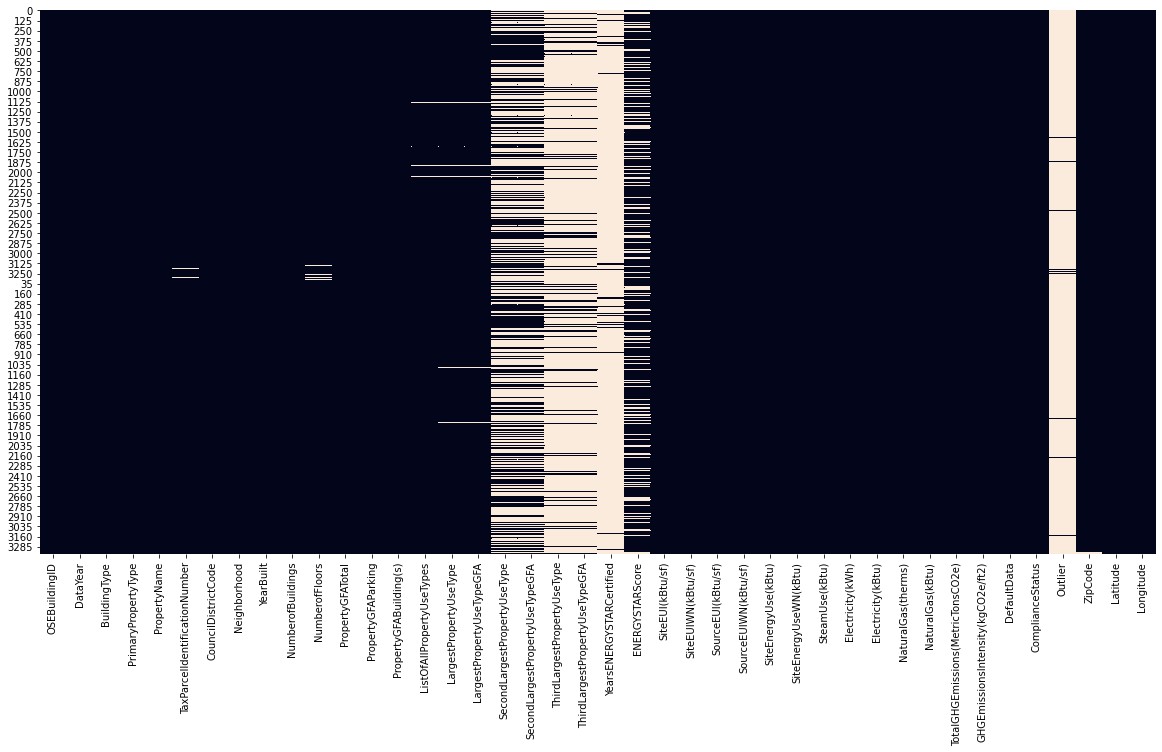

In [51]:
plt.figure(figsize=(20,10))
sns.heatmap(df_2015_2016.isna(), cbar=False)

In [52]:
(df_2015_2016.isna().sum()/df_2015_2016.shape[0]).sort_values(ascending=True)

OSEBuildingID                        0.000000
ComplianceStatus                     0.000000
Latitude                             0.000000
PropertyGFABuilding(s)               0.000000
PropertyGFAParking                   0.000000
PropertyGFATotal                     0.000000
YearBuilt                            0.000000
Longitude                            0.000000
CouncilDistrictCode                  0.000000
PropertyName                         0.000000
PrimaryPropertyType                  0.000000
DataYear                             0.000000
Neighborhood                         0.000000
BuildingType                         0.000000
DefaultData                          0.000149
TaxParcelIdentificationNumber        0.000298
NumberofBuildings                    0.001191
NumberofFloors                       0.001191
SiteEnergyUse(kBtu)                  0.002233
ZipCode                              0.002382
SiteEnergyUseWN(kBtu)                0.002382
SiteEUIWN(kBtu/sf)                

In [53]:
# on retire SecondLargest et ThirdLargest
# => on retire les colonnes avec +50% de valeurs manquantes
df_2015_2016 = df_2015_2016[df_2015_2016.columns[df_2015_2016.isna().sum()/df_2015_2016.shape[0] < 0.5]]
df_2015_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,ZipCode,Latitude,Longitude
0,21548,2015,Multifamily LR (1-4),Low-Rise Multifamily,PUGET VISTA APTS,1992200030,7,MAGNOLIA / QUEEN ANNE,1967,1.0,4.0,40086,6133,33953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Not Compliant,98119.0,47.623052,-122.362312
1,26379,2015,NonResidential,Hotel,GEORGETOWN INN,6920700025,2,GREATER DUWAMISH,1992,1.0,3.0,22452,0,22452,Hotel,Hotel,22452.0,78.0,60.3,61.5,118.2,122.0,1354219.0,1381137.0,0.0,172881.0,589893.0,7644.0,764350.0,44.71,1.88,No,Compliant,98108.0,47.547734,-122.320787
2,26713,2015,Multifamily HR (10+),High-Rise Multifamily,QUINTESSA APTS,5247800955,7,DOWNTOWN,2007,1.0,13.0,90959,0,90959,NaN,NaN,NaN,60.0,48.0,52.2,115.4,126.2,4361755.0,4748161.0,0.0,829363.0,2829904.0,15320.0,1531968.0,101.09,0.98,No,Compliant,98104.0,47.601550,-122.331153
3,102,2015,NonResidential,Hotel,MARRIOTT RESIDENCE INN,1984200065,3,LAKE UNION,1990,1.0,7.0,282863,44766,238097,"Hotel, Parking",Hotel,235788.0,40.0,79.9,85.3,178.1,186.6,18829136.0,20123722.0,0.0,3117920.0,10638785.0,81908.0,8190794.0,509.18,1.64,No,Compliant,98109.0,47.626359,-122.333131
4,503,2015,NonResidential,Supermarket/Grocery Store,RESTAURANT DEPOT,1824049003,2,GREATER DUWAMISH,2008,1.0,1.0,63225,0,63225,Supermarket/Grocery Store,Supermarket/Grocery Store,63225.0,100.0,104.7,104.7,328.8,328.8,6619941.0,6619941.0,0.0,1940194.0,6620217.0,0.0,0.0,46.15,0.28,No,Compliant,98134.0,47.568860,-122.337791


In [54]:
df_2015_2016.shape

(6716, 36)

In [55]:
# on filtre sur NonResidential dans BuildingType
df_2015_2016 = df_2015_2016[df_2015_2016['BuildingType'].isin(['NonResidential'])]
df_2015_2016.shape

(2921, 36)

In [56]:
df_2015_2016['ComplianceStatus']

1       Compliant
3       Compliant
4       Compliant
7       Compliant
8       Compliant
          ...    
3338    Compliant
3339    Compliant
3340    Compliant
3347    Compliant
3356    Compliant
Name: ComplianceStatus, Length: 2921, dtype: object

In [57]:
df_2015_2016['ComplianceStatus'].value_counts()

Compliant                       2893
Non-Compliant                     17
Error - Correct Default Data      10
Missing Data                       1
Name: ComplianceStatus, dtype: int64

In [58]:
df_2015_2016['DefaultData']

1          No
3          No
4          No
7          No
8          No
        ...  
3338    False
3339    False
3340    False
3347    False
3356    False
Name: DefaultData, Length: 2921, dtype: object

In [59]:
df_2015_2016['DefaultData'].value_counts()

False    1450
No       1347
Yes       113
True       10
Name: DefaultData, dtype: int64

In [60]:
# on filtre sur Compliant dans ComplianceStatus
df_2015_2016 = df_2015_2016[df_2015_2016['ComplianceStatus'].isin(['Compliant'])]
df_2015_2016.shape

(2893, 36)

In [61]:
df_2015_2016['DefaultData'].value_counts()

False    1432
No       1347
Yes       113
Name: DefaultData, dtype: int64

In [62]:
# retirer les Yes
df_2015_2016 = df_2015_2016[df_2015_2016['DefaultData']!='Yes']

In [63]:
df_2015_2016.shape

(2780, 36)

In [64]:
df_2015_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,ZipCode,Latitude,Longitude
1,26379,2015,NonResidential,Hotel,GEORGETOWN INN,6920700025,2,GREATER DUWAMISH,1992,1.0,3.0,22452,0,22452,Hotel,Hotel,22452.0,78.0,60.3,61.5,118.2,122.0,1354219.0,1381137.0,0.0,172881.0,589893.0,7644.0,764350.0,44.71,1.88,No,Compliant,98108.0,47.547734,-122.320787
3,102,2015,NonResidential,Hotel,MARRIOTT RESIDENCE INN,1984200065,3,LAKE UNION,1990,1.0,7.0,282863,44766,238097,"Hotel, Parking",Hotel,235788.0,40.0,79.9,85.3,178.1,186.6,18829136.0,20123722.0,0.0,3117920.0,10638785.0,81908.0,8190794.0,509.18,1.64,No,Compliant,98109.0,47.626359,-122.333131
4,503,2015,NonResidential,Supermarket/Grocery Store,RESTAURANT DEPOT,1824049003,2,GREATER DUWAMISH,2008,1.0,1.0,63225,0,63225,Supermarket/Grocery Store,Supermarket/Grocery Store,63225.0,100.0,104.7,104.7,328.8,328.8,6619941.0,6619941.0,0.0,1940194.0,6620217.0,0.0,0.0,46.15,0.28,No,Compliant,98134.0,47.568860,-122.337791
7,635,2015,NonResidential,Small- and Mid-Sized Office,1201 BUILDING,7666206966,2,GREATER DUWAMISH,1914,1.0,2.0,64512,0,64512,Office,Office,63000.0,49.0,97.7,99.3,206.4,203.7,6155789.0,6258938.0,0.0,916964.0,3128812.0,30271.0,3027106.0,182.58,2.62,No,Compliant,98134.0,47.591614,-122.335188
8,481,2015,NonResidential,Large Office,WESTLAKE TERRY - EAST BLDG,1986200185,7,LAKE UNION,2006,1.0,4.0,209816,73673,136143,"Fitness Center/Health Club/Gym, Office, Parkin...",Office,113803.0,95.0,54.4,54.9,145.2,145.8,7380088.0,7452749.0,0.0,1678109.0,5725946.0,16544.0,1654379.0,127.78,0.49,No,Compliant,98109.0,47.621452,-122.337532


In [65]:
df_2015_2016.to_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P4_OC\P4_Donnees\2015_2016_notnorm_Building_Energy_Benchmarking.csv", index=False)

In [66]:
columns = df_2015_2016.columns
columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'DefaultData', 'ComplianceStatus',
       'ZipCode', 'Latitude', 'Longitude'],
      dtype='object')

In [67]:
df_2015_2016[["PropertyGFATotal", "PropertyGFAParking", "PropertyGFABuilding(s)", "LargestPropertyUseTypeGFA"]].head() 
# PropertyGFATotal = PropertyGFAParking + PropertyGFABuilding(s)

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA
1,22452,0,22452,22452.0
3,282863,44766,238097,235788.0
4,63225,0,63225,63225.0
7,64512,0,64512,63000.0
8,209816,73673,136143,113803.0


In [68]:
df_2015_2016[["GHGEmissionsIntensity(kgCO2e/ft2)", "TotalGHGEmissions(MetricTonsCO2e)", "PropertyGFATotal"]].head() 
# GHGEmissionsIntensity(kgCO2e/ft2) ~ TotalGHGEmissions(MetricTonsCO2e) / PropertyGFATotal
# (ex : 1.99, 1.80, 0.72, 2.83)

,GHGEmissionsIntensity(kgCO2e/ft2),TotalGHGEmissions(MetricTonsCO2e),PropertyGFATotal
1,1.88,44.71,22452
3,1.64,509.18,282863
4,0.28,46.15,63225
7,2.62,182.58,64512
8,0.49,127.78,209816


In [69]:
df_2015_2016 = df_2015_2016[['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType','PropertyName', 
                             'TaxParcelIdentificationNumber', 'CouncilDistrictCode','Neighborhood', 'YearBuilt', 
                             'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 
                             'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
                             'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 
                             'SiteEnergyUse(kBtu)',  'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 
                             'TotalGHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'DefaultData', 
                             'ComplianceStatus', 'ZipCode', 'Latitude', 'Longitude']]
# SiteEUIWN(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUseWN(kBtu) : projections sur 30 ans
# NaturalGas(therms), Electricity(kWh) : on considère la mesure kbtu 

In [70]:
df_2015_2016.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ZipCode,Latitude,Longitude
count,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000,2779.000000,2.780000e+03,2780.000000,2.780000e+03,2.716000e+03,1876.000000,2779.000000,2779.000000,2.779000e+03,2.779000e+03,2.779000e+03,2.779000e+03,2779.000000,2779.000000,2780.000000,2780.000000,2780.000000
mean,15789.946043,2015.515108,4.424101,1960.857554,1.021583,4.365239,1.131196e+05,14978.728058,9.814087e+04,9.072248e+04,62.886461,73.321878,181.460022,7.746295e+06,5.166872e+05,5.549006e+06,1.658172e+06,166.631080,1.453411,98116.361151,47.615725,-122.333848
std,13103.843287,0.499862,2.199397,32.857011,0.414172,6.586039,1.929104e+05,46121.831106,1.669051e+05,1.572995e+05,29.028637,74.977251,189.044262,1.921687e+07,5.442914e+06,1.350592e+07,5.608662e+06,586.188439,2.164774,17.247009,0.046218,0.022845
min,1.000000,2015.000000,1.000000,1900.000000,0.000000,0.000000,1.630000e+04,-2.000000,-5.055000e+04,5.656000e+03,1.000000,0.000000,-2.000000,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000,-0.020000,98006.000000,47.509435,-122.411820
25%,602.750000,2015.000000,2.000000,1929.000000,1.000000,1.000000,2.920700e+04,0.000000,2.830200e+04,2.507725e+04,43.000000,33.549999,76.599998,1.186929e+06,0.000000e+00,7.135360e+05,0.000000e+00,19.155000,0.260000,98104.000000,47.587637,-122.342740
50%,21115.000000,2016.000000,4.000000,1965.000000,1.000000,3.000000,4.801300e+04,0.000000,4.598000e+04,4.160450e+04,70.000000,52.700001,137.199997,2.581742e+06,0.000000e+00,1.689972e+06,4.145870e+05,47.120000,0.720000,98109.000000,47.612380,-122.333272
75%,24514.000000,2016.000000,7.000000,1988.000000,1.000000,5.000000,1.042358e+05,0.000000,9.383225e+04,8.908900e+04,88.000000,82.649999,211.599999,6.987606e+06,0.000000e+00,5.159622e+06,1.322171e+06,133.560000,1.735000,98122.000000,47.648240,-122.323610
max,50094.000000,2016.000000,7.000000,2015.000000,9.000000,99.000000,1.952220e+06,512608.000000,1.765970e+06,1.680937e+06,100.000000,834.400024,2620.000000,2.958126e+08,1.349435e+08,2.847263e+08,1.381912e+08,12307.160000,31.380000,98199.000000,47.733870,-122.261800


In [71]:
df_2015_2016.describe().shape

(8, 22)

## Avec energyscore :

In [72]:
# liste de colonnes numériques pour la regression avec ENERGYSTARScore (list_cols_training_with_energyscore) 
list_cols_training_with_energyscore = df_2015_2016.describe().columns
list_cols_training_with_energyscore

Index(['OSEBuildingID', 'DataYear', 'CouncilDistrictCode', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'ZipCode', 'Latitude',
       'Longitude'],
      dtype='object')

In [73]:
list_cols_training_with_energyscore = df_2015_2016[['OSEBuildingID', 'DataYear', 'CouncilDistrictCode', 'LargestPropertyUseType', 'YearBuilt',
                                                    'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
                                                    'PropertyGFAParking', 'PropertyGFABuilding(s)',
                                                    'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
                                                    'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',  'SteamUse(kBtu)',
                                                    'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions(MetricTonsCO2e)',
                                                    'GHGEmissionsIntensity(kgCO2e/ft2)', 'ZipCode', 'Latitude', 'Longitude']]

In [74]:
list_cols_training_with_energyscore.shape

(2780, 23)

# 2. Analyse de fond :

## Boxplot

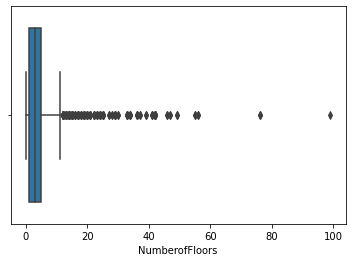

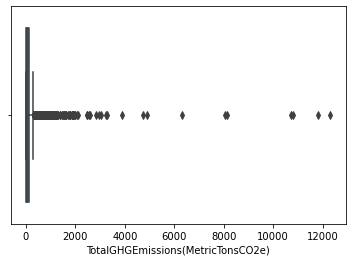

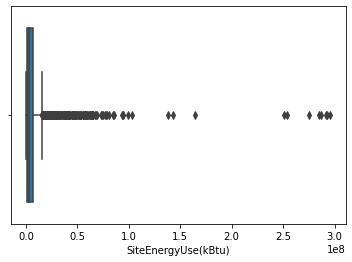

In [75]:
for col in list_cols_training_with_energyscore[['NumberofFloors', 'TotalGHGEmissions(MetricTonsCO2e)', 'SiteEnergyUse(kBtu)']]:
    plt.figure()
    sns.boxplot(x=list_cols_training_with_energyscore[col])

## Analyse des outliers sur 2/3 variables

In [76]:
df1_2015_2016 = list_cols_training_with_energyscore['OSEBuildingID']

In [77]:
df2_2015_2016 = list_cols_training_with_energyscore['DataYear']

In [78]:
df3_2015_2016 = list_cols_training_with_energyscore['CouncilDistrictCode']

In [79]:
df4_2015_2016 = list_cols_training_with_energyscore['LargestPropertyUseType']

In [80]:
df5_2015_2016 = list_cols_training_with_energyscore['YearBuilt']

In [81]:
df6_2015_2016 = list_cols_training_with_energyscore['NumberofBuildings']

In [82]:
# nbr floors
Q3 = list_cols_training_with_energyscore['NumberofFloors'].quantile(0.75)
Q1 = list_cols_training_with_energyscore['NumberofFloors'].quantile(0.25)
IQR = Q3 - Q1
filter=list_cols_training_with_energyscore['NumberofFloors']<= Q3 + 1.5 * IQR
df7_2015_2016 = list_cols_training_with_energyscore[filter]

In [83]:
df8_2015_2016 = list_cols_training_with_energyscore['PropertyGFATotal']

In [84]:
df9_2015_2016 = list_cols_training_with_energyscore['PropertyGFAParking']

In [85]:
df10_2015_2016 = list_cols_training_with_energyscore['PropertyGFABuilding(s)']

In [86]:
df11_2015_2016 = list_cols_training_with_energyscore['LargestPropertyUseTypeGFA']

In [87]:
df12_2015_2016 = list_cols_training_with_energyscore['ENERGYSTARScore']

In [88]:
df13_2015_2016 = list_cols_training_with_energyscore['SiteEUI(kBtu/sf)']

In [89]:
# target 
Q3 = list_cols_training_with_energyscore['SiteEnergyUse(kBtu)'].quantile(0.75)
Q1 = list_cols_training_with_energyscore['SiteEnergyUse(kBtu)'].quantile(0.25)
IQR = Q3 - Q1
filter=list_cols_training_with_energyscore['SiteEnergyUse(kBtu)']<= Q3 + 1.5 * IQR
df14_2015_2016 = list_cols_training_with_energyscore['SiteEnergyUse(kBtu)']

In [90]:
df15_2015_2016= list_cols_training_with_energyscore['SteamUse(kBtu)']

In [91]:
df16_2015_2016 = list_cols_training_with_energyscore['Electricity(kBtu)']

In [92]:
df17_2015_2016 = list_cols_training_with_energyscore['NaturalGas(kBtu)']

In [93]:
# target
Q3 = list_cols_training_with_energyscore['TotalGHGEmissions(MetricTonsCO2e)'].quantile(0.75)
Q1 = list_cols_training_with_energyscore['TotalGHGEmissions(MetricTonsCO2e)'].quantile(0.25)
IQR = Q3 - Q1
filter=list_cols_training_with_energyscore['TotalGHGEmissions(MetricTonsCO2e)']<= Q3 + 1.5 * IQR
df18_2015_2016 = list_cols_training_with_energyscore[filter]

In [94]:
df19_2015_2016 = list_cols_training_with_energyscore['GHGEmissionsIntensity(kgCO2e/ft2)']

In [95]:
df20_2015_2016 = list_cols_training_with_energyscore['ZipCode']

In [96]:
df21_2015_2016 = list_cols_training_with_energyscore['Latitude']

In [97]:
df22_2015_2016 = list_cols_training_with_energyscore['Longitude']

In [98]:
union_index = df1_2015_2016.index.union(df2_2015_2016.index).union(df3_2015_2016.index).union(df4_2015_2016.index).union(df5_2015_2016.index).union(df6_2015_2016.index).union(df7_2015_2016.index).union(df8_2015_2016.index).union(df9_2015_2016.index).union(df10_2015_2016.index).union(df11_2015_2016.index).union(df12_2015_2016.index).union(df13_2015_2016.index).union(df14_2015_2016.index).union(df15_2015_2016.index).union(df16_2015_2016.index).union(df17_2015_2016.index).union(df18_2015_2016.index).union(df19_2015_2016.index).union(df20_2015_2016.index).union(df21_2015_2016.index).union(df22_2015_2016.index)

In [99]:
list_cols_training_with_energyscore = list_cols_training_with_energyscore.loc[union_index]
list_cols_training_with_energyscore

,OSEBuildingID,DataYear,CouncilDistrictCode,LargestPropertyUseType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ZipCode,Latitude,Longitude
0,1,2016,7,Hotel,1927,1.0,12.0,88434,0,88434,88434.0,60.0,81.699997,182.500000,7226362.50,2003882.0,3946027.0,1276453.0,249.98,2.83,98101.0,47.612200,-122.337990
1,26379,2015,2,Hotel,1992,1.0,3.0,22452,0,22452,22452.0,78.0,60.300000,118.200000,1354219.00,0.0,589893.0,764350.0,44.71,1.88,98108.0,47.547734,-122.320787
1,2,2016,7,Hotel,1996,1.0,11.0,103566,15064,88502,83880.0,61.0,94.800003,176.100006,8387933.00,0.0,3242851.0,5145082.0,295.86,2.86,98101.0,47.613170,-122.333930
1,26379,2015,2,Hotel,1992,1.0,3.0,22452,0,22452,22452.0,78.0,60.300000,118.200000,1354219.00,0.0,589893.0,764350.0,44.71,1.88,98108.0,47.547734,-122.320787
1,2,2016,7,Hotel,1996,1.0,11.0,103566,15064,88502,83880.0,61.0,94.800003,176.100006,8387933.00,0.0,3242851.0,5145082.0,295.86,2.86,98101.0,47.613170,-122.333930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,50068,2016,2,Non-Refrigerated Warehouse,1955,1.0,1.0,52085,4222,47863,52085.0,37.0,69.199997,102.099998,3605855.50,0.0,732803.0,2873052.0,157.70,3.03,98108.0,47.544250,-122.317760
3339,50069,2016,2,Office,1929,1.0,2.0,24990,0,24990,24990.0,9.0,176.899994,367.000000,4420650.50,0.0,2167029.0,2253621.0,134.80,5.39,98108.0,47.531610,-122.299440
3340,50070,2016,4,Other - Recreation,2013,1.0,1.0,72000,0,72000,72000.0,NaN,40.599998,97.900002,2925780.00,0.0,1901620.0,1024160.0,67.65,0.94,98155.0,47.681090,-122.261800
3347,50081,2016,3,K-12 School,2015,1.0,3.0,45000,0,45000,45728.0,77.0,29.000000,91.099998,1325972.75,0.0,1325973.0,0.0,9.24,0.21,98144.0,47.588310,-122.306500


In [100]:
list_cols_training_with_energyscore.shape # shape après analyse outliers > shape avant analyse outliers -> bizarre

(4214, 23)

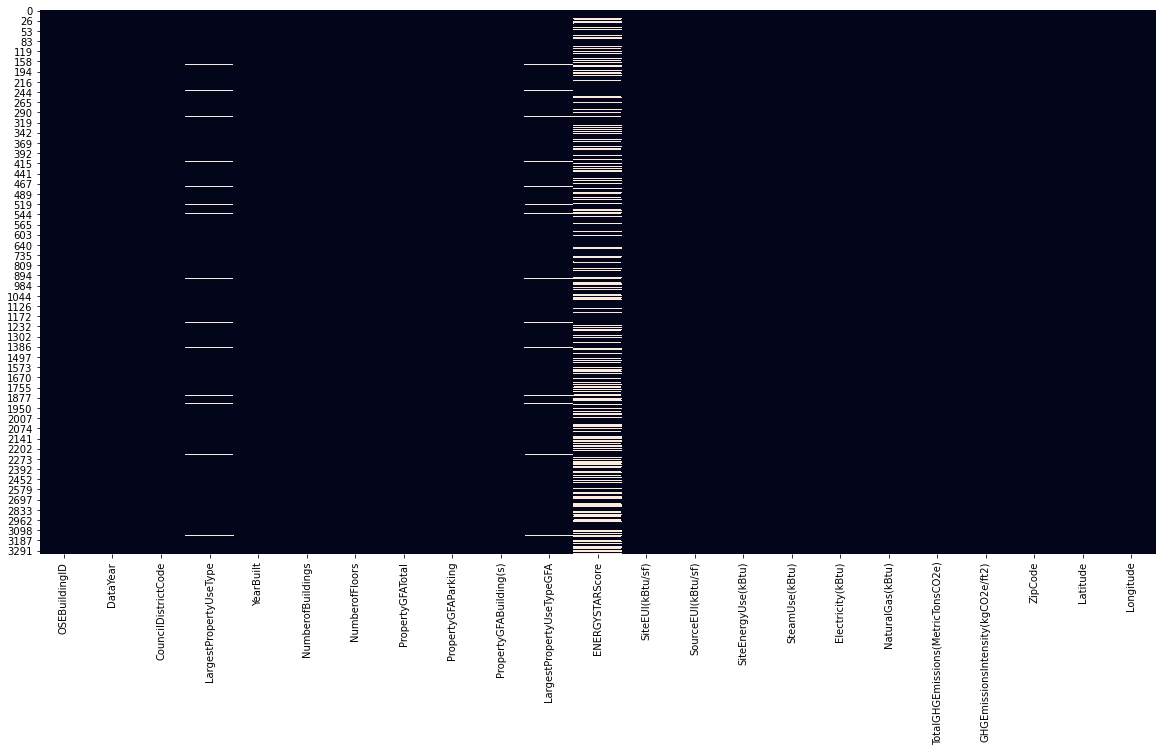

In [101]:
plt.figure(figsize=(20,10))
sns.heatmap(list_cols_training_with_energyscore.isna(), cbar=False)

In [102]:
(list_cols_training_with_energyscore.isna().sum()/list_cols_training_with_energyscore.shape[0]).sort_values(ascending=True)

OSEBuildingID                        0.000000
ZipCode                              0.000000
Latitude                             0.000000
PropertyGFABuilding(s)               0.000000
PropertyGFAParking                   0.000000
PropertyGFATotal                     0.000000
Longitude                            0.000000
NumberofBuildings                    0.000000
YearBuilt                            0.000000
CouncilDistrictCode                  0.000000
DataYear                             0.000000
SiteEUI(kBtu/sf)                     0.000237
SourceEUI(kBtu/sf)                   0.000237
SiteEnergyUse(kBtu)                  0.000237
SteamUse(kBtu)                       0.000237
Electricity(kBtu)                    0.000237
NaturalGas(kBtu)                     0.000237
TotalGHGEmissions(MetricTonsCO2e)    0.000237
GHGEmissionsIntensity(kgCO2e/ft2)    0.000237
NumberofFloors                       0.000237
LargestPropertyUseType               0.023968
LargestPropertyUseTypeGFA         

In [103]:
list_cols_training_with_energyscore.shape

(4214, 23)

In [104]:
list_cols_training_with_energyscore[list_cols_training_with_energyscore.duplicated(['OSEBuildingID'])].shape # Seattle OSE Building Identification Number (Building ID) 
                                                                               # A unique building identification number
                                                                               # assigned by OSE to each covered building to facilitate annual benchmarking submission and compliance tracking.


(2740, 23)

In [105]:
# retrait des doublons
list_cols_training_with_energyscore = list_cols_training_with_energyscore.drop_duplicates(keep='first')

In [106]:
list_cols_training_with_energyscore.shape

(2780, 23)

In [107]:
# retrait des NaN
list_cols_training_with_energyscore = list_cols_training_with_energyscore.dropna()

In [108]:
list_cols_training_with_energyscore.shape

(1829, 23)

In [109]:
print(list_cols_training_with_energyscore.columns)

Index(['OSEBuildingID', 'DataYear', 'CouncilDistrictCode',
       'LargestPropertyUseType', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'ZipCode', 'Latitude',
       'Longitude'],
      dtype='object')


## Distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
<ipython-input-110-0b6ecceaa391>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-110-0b6ecceaa391>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figur

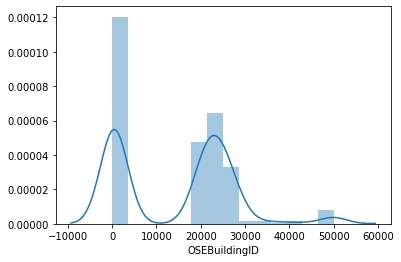

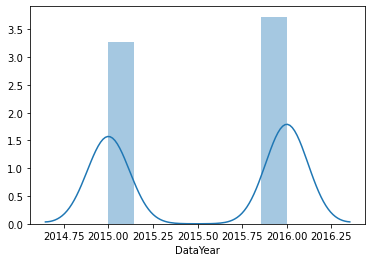

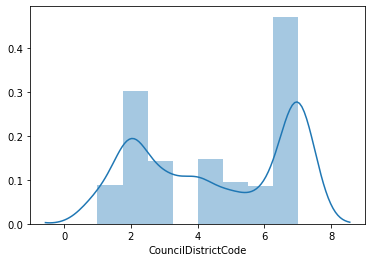

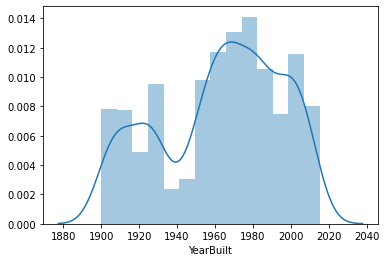

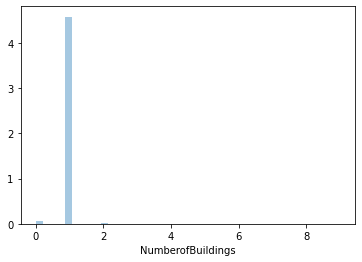

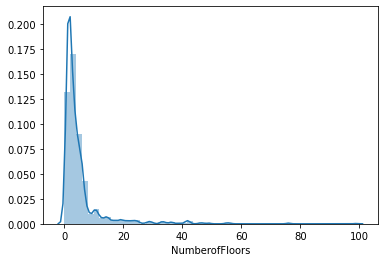

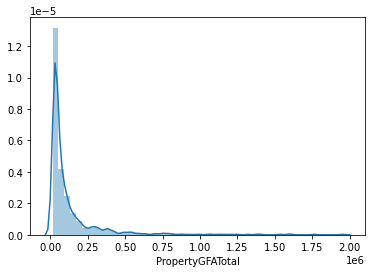

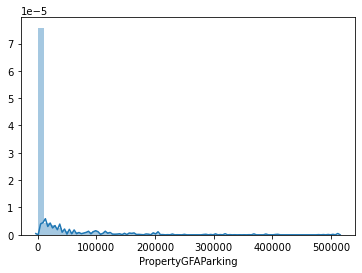

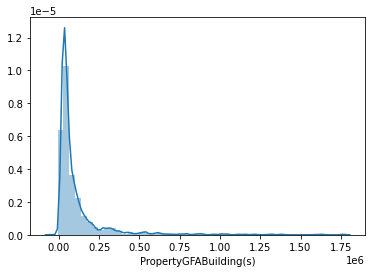

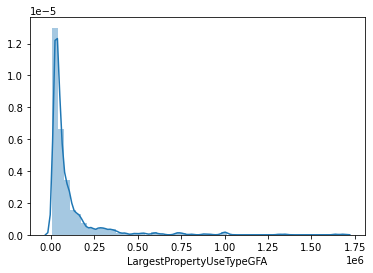

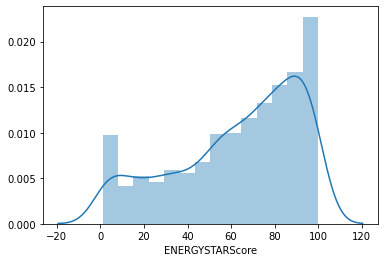

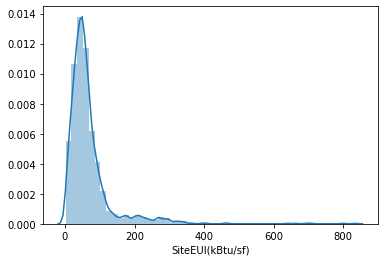

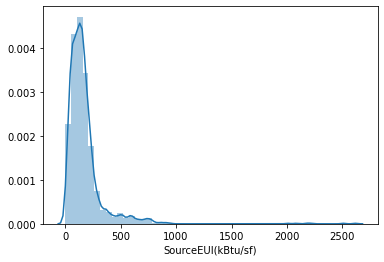

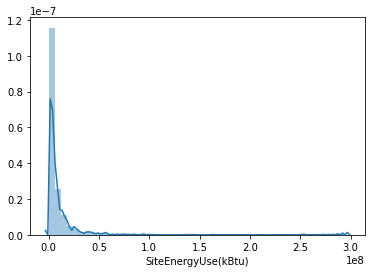

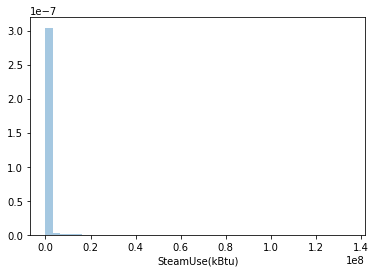

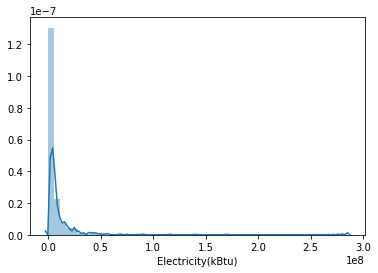

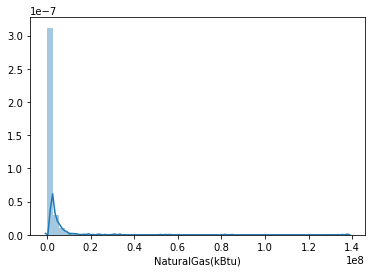

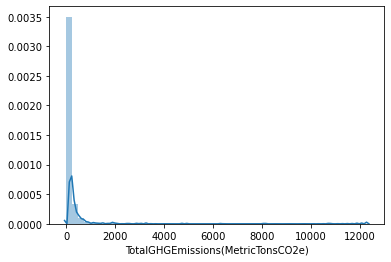

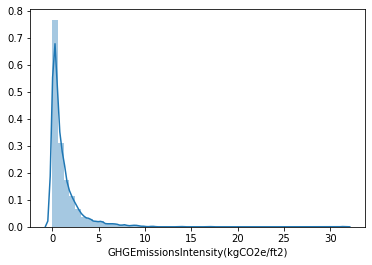

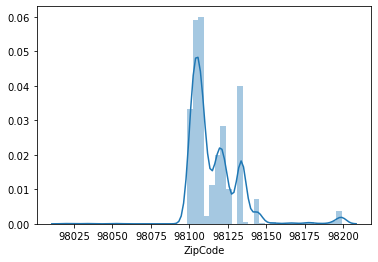

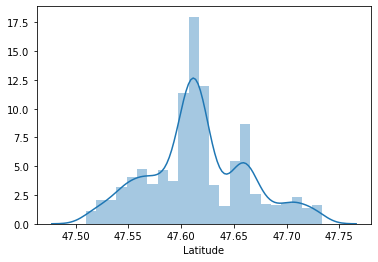

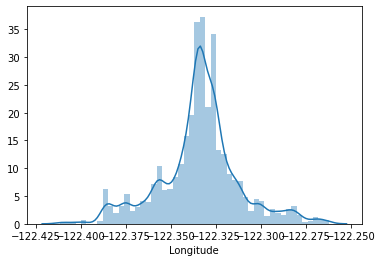

In [110]:
for col in list_cols_training_with_energyscore[['OSEBuildingID', 'DataYear', 'CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings',
                                                'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking','PropertyGFABuilding(s)', 
                                                'LargestPropertyUseTypeGFA','ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
                                                'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 
                                                'TotalGHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'ZipCode', 'Latitude',
                                                'Longitude']]:
    plt.figure()
    sns.distplot(list_cols_training_with_energyscore[col])

## Target

In [111]:
# retrait valeurs à 0 dans la target # TotalGHGEmissions(MetricTonsCO2e)
# Sur ce filtre, il est important de regarder combien de valeurs on retire afin de vérifier que l'on ne supprime pas toutes les données
nb_rows_removed = list_cols_training_with_energyscore[~((list_cols_training_with_energyscore["TotalGHGEmissions(MetricTonsCO2e)"].notnull()) & (list_cols_training_with_energyscore["TotalGHGEmissions(MetricTonsCO2e)"] > 0))].shape[0]
print("Number of rows removed : {}".format(nb_rows_removed))
list_cols_training_with_energyscore = list_cols_training_with_energyscore[(list_cols_training_with_energyscore["TotalGHGEmissions(MetricTonsCO2e)"].notnull()) & (list_cols_training_with_energyscore["TotalGHGEmissions(MetricTonsCO2e)"] > 0)]

Number of rows removed : 2


In [112]:
# Dans ce cas, 2 données est acceptable. 

In [113]:
# retrait valeurs à 0 dans la target # SiteEnergyUse(kBtu)
# Sur ce filtre, il est important de regarder combien de valeurs on retire afin de vérifier que l'on ne supprime pas toutes les données
nb_rows_removed = list_cols_training_with_energyscore[~((list_cols_training_with_energyscore["SiteEnergyUse(kBtu)"].notnull()) & (list_cols_training_with_energyscore["SiteEnergyUse(kBtu)"] > 0))].shape[0]
print("Number of rows removed : {}".format(nb_rows_removed))
list_cols_training_with_energyscore = list_cols_training_with_energyscore[(list_cols_training_with_energyscore["SiteEnergyUse(kBtu)"].notnull()) & (list_cols_training_with_energyscore["SiteEnergyUse(kBtu)"] > 0)]

Number of rows removed : 0


In [114]:
# Dans ce cas, 0 donnée. 

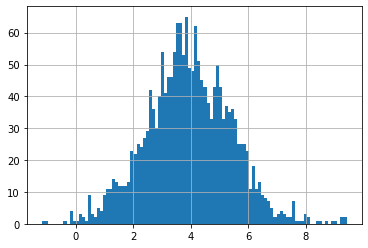

In [115]:
# target # TotalGHGEmissions(MetricTonsCO2e)
# passage au log
np.log(list_cols_training_with_energyscore["TotalGHGEmissions(MetricTonsCO2e)"]).hist(bins=100)

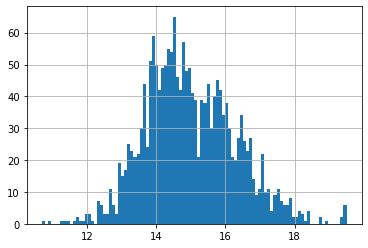

In [116]:
# target # SiteEnergyUse(kBtu)
# passage au log
np.log(list_cols_training_with_energyscore["SiteEnergyUse(kBtu)"]).hist(bins=100)

In [117]:
# intégrer Log_TotalGHGEmissions(MetricTonsCO2e) dans le dataframe
list_cols_training_with_energyscore["Log_TotalGHGEmissions(MetricTonsCO2e)"] = np.log(list_cols_training_with_energyscore["TotalGHGEmissions(MetricTonsCO2e)"])

In [118]:
# intégrer Log_SiteEnergyUse(kBtu) dans le dataframe
list_cols_training_with_energyscore["Log_SiteEnergyUse(kBtu)"] = np.log(list_cols_training_with_energyscore["SiteEnergyUse(kBtu)"])

In [119]:
print(list_cols_training_with_energyscore.columns)

Index(['OSEBuildingID', 'DataYear', 'CouncilDistrictCode',
       'LargestPropertyUseType', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'ZipCode', 'Latitude', 'Longitude',
       'Log_TotalGHGEmissions(MetricTonsCO2e)', 'Log_SiteEnergyUse(kBtu)'],
      dtype='object')


In [120]:
# supprimer les colonnes # TotalGHGEmissions(MetricTonsCO2e) # SiteEnergyUse(kBtu)
list_cols_training_with_energyscore.drop(['TotalGHGEmissions(MetricTonsCO2e)', 'SiteEnergyUse(kBtu)'], axis='columns', inplace=True)

In [121]:
print(list_cols_training_with_energyscore.columns)

Index(['OSEBuildingID', 'DataYear', 'CouncilDistrictCode',
       'LargestPropertyUseType', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'ZipCode', 'Latitude', 'Longitude',
       'Log_TotalGHGEmissions(MetricTonsCO2e)', 'Log_SiteEnergyUse(kBtu)'],
      dtype='object')


In [122]:
list_cols_training_with_energyscore.shape

(1827, 23)

## Variables

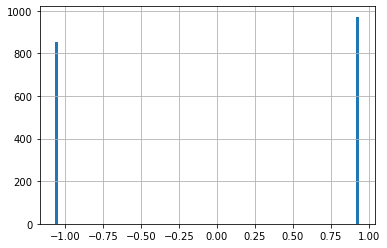

In [123]:
# normaliser DataYear
((list_cols_training_with_energyscore['DataYear']-list_cols_training_with_energyscore['DataYear'].mean())/list_cols_training_with_energyscore['DataYear'].std()).hist(bins=100)

In [124]:
# intégrer N_DataYear dans le dataframe
list_cols_training_with_energyscore["N_DataYear"] = (list_cols_training_with_energyscore['DataYear']-list_cols_training_with_energyscore['DataYear'].mean())/list_cols_training_with_energyscore['DataYear'].std()

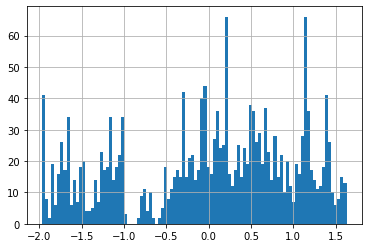

In [125]:
# normaliser YearBuilt
((list_cols_training_with_energyscore['YearBuilt']-list_cols_training_with_energyscore['YearBuilt'].mean())/list_cols_training_with_energyscore['YearBuilt'].std()).hist(bins=100)

In [126]:
# intégrer N_YearBuilt dans le dataframe
list_cols_training_with_energyscore["N_YearBuilt"] = (list_cols_training_with_energyscore['YearBuilt']-list_cols_training_with_energyscore['YearBuilt'].mean())/list_cols_training_with_energyscore['YearBuilt'].std()

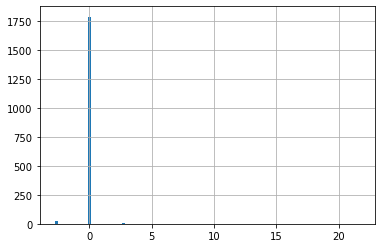

In [127]:
# normaliser NumberofBuildings
((list_cols_training_with_energyscore['NumberofBuildings']-list_cols_training_with_energyscore['NumberofBuildings'].mean())/list_cols_training_with_energyscore['NumberofBuildings'].std()).hist(bins=100)

In [128]:
# intégrer N_NumberofBuildings dans le dataframe
list_cols_training_with_energyscore["N_NumberofBuildings"] = (list_cols_training_with_energyscore['NumberofBuildings']-list_cols_training_with_energyscore['NumberofBuildings'].mean())/list_cols_training_with_energyscore['NumberofBuildings'].std()

In [129]:
# retrait valeurs à 0 dans la target # NumberofFloors
# non, car on souhaite conserver les étages "0" dans l'étude

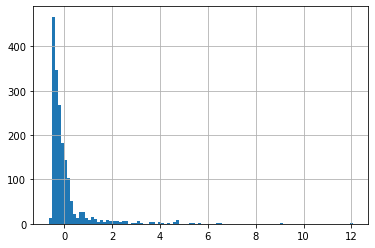

In [130]:
# normaliser NumberofFloors
((list_cols_training_with_energyscore['NumberofFloors']-list_cols_training_with_energyscore['NumberofFloors'].mean())/list_cols_training_with_energyscore['NumberofFloors'].std()).hist(bins=100)

In [131]:
# intégrer N_NumberofFloors dans le dataframe
list_cols_training_with_energyscore["N_NumberofFloors"] = (list_cols_training_with_energyscore['NumberofFloors']-list_cols_training_with_energyscore['NumberofFloors'].mean())/list_cols_training_with_energyscore['NumberofFloors'].std()

In [132]:
# retrait valeurs à 0 dans la target # TotalGHGEmissions
# Sur ce filtre, il est important de regarder combien de valeurs on retire afin de vérifier que l'on ne supprime pas toutes les données
#nb_rows_removed = num_cols_training_with_energyscore[~((num_cols_training_with_energyscore["PropertyGFATotal"].notnull()) & (num_cols_training_with_energyscore["PropertyGFATotal"] > 0))].shape[0]
#print("Number of rows removed : {}".format(nb_rows_removed))
#num_cols_training_with_energyscore = num_cols_training_with_energyscore[(num_cols_training_with_energyscore["PropertyGFATotal"].notnull()) & (num_cols_training_with_energyscore["PropertyGFATotal"] > 0)]

In [133]:
# Dans ce cas, 1482 données sur un total de 1956 données

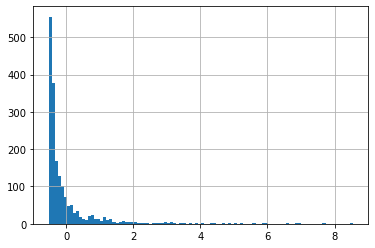

In [134]:
# normaliser PropertyGFATotal
((list_cols_training_with_energyscore['PropertyGFATotal']-list_cols_training_with_energyscore['PropertyGFATotal'].mean())/list_cols_training_with_energyscore['PropertyGFATotal'].std()).hist(bins=100)

In [135]:
# intégrer N_PropertyGFATotal dans le dataframe
list_cols_training_with_energyscore["N_PropertyGFATotal"] = (list_cols_training_with_energyscore['PropertyGFATotal']-list_cols_training_with_energyscore['PropertyGFATotal'].mean())/list_cols_training_with_energyscore['PropertyGFATotal'].std()

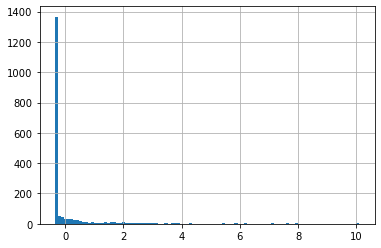

In [136]:
# normaliser PropertyGFAParking
((list_cols_training_with_energyscore['PropertyGFAParking']-list_cols_training_with_energyscore['PropertyGFAParking'].mean())/list_cols_training_with_energyscore['PropertyGFAParking'].std()).hist(bins=100)

In [137]:
# intégrer N_PropertyGFAParking dans le dataframe
list_cols_training_with_energyscore["N_PropertyGFAParking"] = (list_cols_training_with_energyscore['PropertyGFAParking']-list_cols_training_with_energyscore['PropertyGFAParking'].mean())/list_cols_training_with_energyscore['PropertyGFAParking'].std()

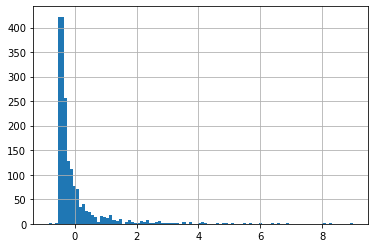

In [138]:
# normaliser PropertyGFABuilding(s)
((list_cols_training_with_energyscore['PropertyGFABuilding(s)']-list_cols_training_with_energyscore['PropertyGFABuilding(s)'].mean())/list_cols_training_with_energyscore['PropertyGFABuilding(s)'].std()).hist(bins=100)

In [139]:
# intégrer N_PropertyGFABuilding(s) dans le dataframe
list_cols_training_with_energyscore["N_PropertyGFABuilding(s)"] = (list_cols_training_with_energyscore['PropertyGFABuilding(s)']-list_cols_training_with_energyscore['PropertyGFABuilding(s)'].mean())/list_cols_training_with_energyscore['PropertyGFABuilding(s)'].std()

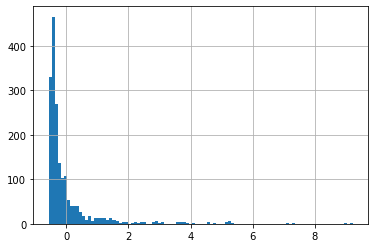

In [140]:
# normaliser LargestPropertyUseTypeGFA
((list_cols_training_with_energyscore['LargestPropertyUseTypeGFA']-list_cols_training_with_energyscore['LargestPropertyUseTypeGFA'].mean())/list_cols_training_with_energyscore['LargestPropertyUseTypeGFA'].std()).hist(bins=100)

In [141]:
# intégrer N_LargestPropertyUseTypeGFA dans le dataframe
list_cols_training_with_energyscore["N_LargestPropertyUseTypeGFA"] = (list_cols_training_with_energyscore['LargestPropertyUseTypeGFA']-list_cols_training_with_energyscore['LargestPropertyUseTypeGFA'].mean())/list_cols_training_with_energyscore['LargestPropertyUseTypeGFA'].std()

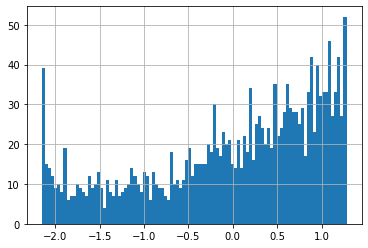

In [142]:
# normaliser ENERGYSTARScore
((list_cols_training_with_energyscore['ENERGYSTARScore']-list_cols_training_with_energyscore['ENERGYSTARScore'].mean())/list_cols_training_with_energyscore['ENERGYSTARScore'].std()).hist(bins=100)

In [143]:
# intégrer N_ENERGYSTARScore dans le dataframe
list_cols_training_with_energyscore["N_ENERGYSTARScore"] = (list_cols_training_with_energyscore['ENERGYSTARScore']-list_cols_training_with_energyscore['ENERGYSTARScore'].mean())/list_cols_training_with_energyscore['ENERGYSTARScore'].std()

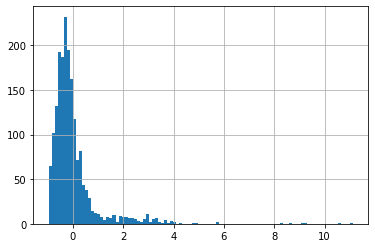

In [144]:
# normaliser SiteEUI(kBtu/sf)
((list_cols_training_with_energyscore['SiteEUI(kBtu/sf)']-list_cols_training_with_energyscore['SiteEUI(kBtu/sf)'].mean())/list_cols_training_with_energyscore['SiteEUI(kBtu/sf)'].std()).hist(bins=100)

In [145]:
# intégrer N_SiteEUI(kBtu/sf) dans le dataframe
list_cols_training_with_energyscore["N_SiteEUI(kBtu/sf)"] = (list_cols_training_with_energyscore['SiteEUI(kBtu/sf)']-list_cols_training_with_energyscore['SiteEUI(kBtu/sf)'].mean())/list_cols_training_with_energyscore['SiteEUI(kBtu/sf)'].std()

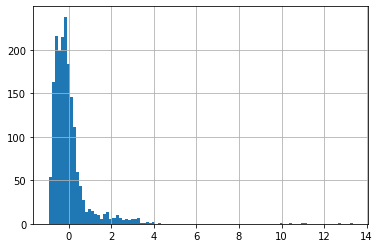

In [146]:
# normaliser SourceEUI(kBtu/sf)
((list_cols_training_with_energyscore['SourceEUI(kBtu/sf)']-list_cols_training_with_energyscore['SourceEUI(kBtu/sf)'].mean())/list_cols_training_with_energyscore['SourceEUI(kBtu/sf)'].std()).hist(bins=100)

In [147]:
# intégrer N_SourceEUI(kBtu/sf) dans le dataframe
list_cols_training_with_energyscore["N_SourceEUI(kBtu/sf)"] = (list_cols_training_with_energyscore['SourceEUI(kBtu/sf)']-list_cols_training_with_energyscore['SourceEUI(kBtu/sf)'].mean())/list_cols_training_with_energyscore['SourceEUI(kBtu/sf)'].std()

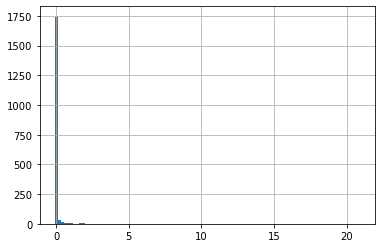

In [148]:
# normaliser SteamUse(kBtu)
((list_cols_training_with_energyscore['SteamUse(kBtu)']-list_cols_training_with_energyscore['SteamUse(kBtu)'].mean())/list_cols_training_with_energyscore['SteamUse(kBtu)'].std()).hist(bins=100)

In [149]:
# intégrer N_SteamUse(kBtu) dans le dataframe
list_cols_training_with_energyscore["N_SteamUse(kBtu)"] = (list_cols_training_with_energyscore['SteamUse(kBtu)']-list_cols_training_with_energyscore['SteamUse(kBtu)'].mean())/list_cols_training_with_energyscore['SteamUse(kBtu)'].std()

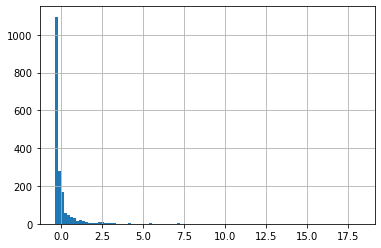

In [150]:
# normaliser Electricity(kBtu)
((list_cols_training_with_energyscore['Electricity(kBtu)']-list_cols_training_with_energyscore['Electricity(kBtu)'].mean())/list_cols_training_with_energyscore['Electricity(kBtu)'].std()).hist(bins=100)

In [151]:
# intégrer N_Electricity(kBtu) dans le dataframe
list_cols_training_with_energyscore["N_Electricity(kBtu)"] = (list_cols_training_with_energyscore['Electricity(kBtu)']-list_cols_training_with_energyscore['Electricity(kBtu)'].mean())/list_cols_training_with_energyscore['Electricity(kBtu)'].std()

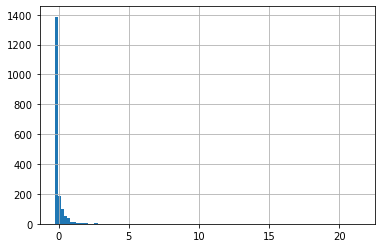

In [152]:
# normaliser NaturalGas(kBtu)
((list_cols_training_with_energyscore['NaturalGas(kBtu)']-list_cols_training_with_energyscore['NaturalGas(kBtu)'].mean())/list_cols_training_with_energyscore['NaturalGas(kBtu)'].std()).hist(bins=100)

In [153]:
# intégrer N_NaturalGas(kBtu) dans le dataframe
list_cols_training_with_energyscore["N_NaturalGas(kBtu)"] = (list_cols_training_with_energyscore['NaturalGas(kBtu)']-list_cols_training_with_energyscore['NaturalGas(kBtu)'].mean())/list_cols_training_with_energyscore['NaturalGas(kBtu)'].std()

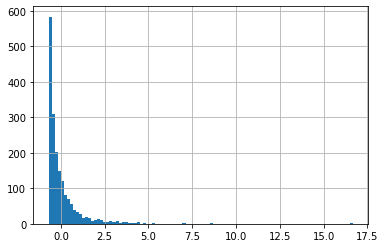

In [154]:
# normaliser GHGEmissionsIntensity(kgCO2e/ft2)
((list_cols_training_with_energyscore['GHGEmissionsIntensity(kgCO2e/ft2)']-list_cols_training_with_energyscore['GHGEmissionsIntensity(kgCO2e/ft2)'].mean())/list_cols_training_with_energyscore['GHGEmissionsIntensity(kgCO2e/ft2)'].std()).hist(bins=100)

In [155]:
# intégrer N_GHGEmissionsIntensity(kgCO2e/ft2) dans le dataframe
list_cols_training_with_energyscore["N_GHGEmissionsIntensity(kgCO2e/ft2)"] = (list_cols_training_with_energyscore['GHGEmissionsIntensity(kgCO2e/ft2)']-list_cols_training_with_energyscore['GHGEmissionsIntensity(kgCO2e/ft2)'].mean())/list_cols_training_with_energyscore['GHGEmissionsIntensity(kgCO2e/ft2)'].std()

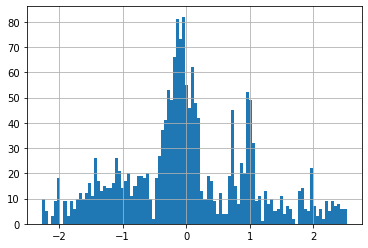

In [156]:
# normaliser Latitude
((list_cols_training_with_energyscore['Latitude']-list_cols_training_with_energyscore['Latitude'].mean())/list_cols_training_with_energyscore['Latitude'].std()).hist(bins=100)

In [157]:
# intégrer N_Latitude dans le dataframe
list_cols_training_with_energyscore["N_Latitude"] = (list_cols_training_with_energyscore['Latitude']-list_cols_training_with_energyscore['Latitude'].mean())/list_cols_training_with_energyscore['Latitude'].std()

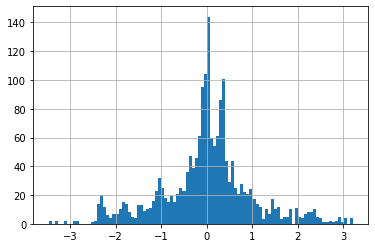

In [158]:
# normaliser Latitude
((list_cols_training_with_energyscore['Longitude']-list_cols_training_with_energyscore['Longitude'].mean())/list_cols_training_with_energyscore['Longitude'].std()).hist(bins=100)

In [159]:
# intégrer N_Longitude dans le dataframe
list_cols_training_with_energyscore["N_Longitude"] = (list_cols_training_with_energyscore['Longitude']-list_cols_training_with_energyscore['Longitude'].mean())/list_cols_training_with_energyscore['Longitude'].std()

In [160]:
print(list_cols_training_with_energyscore.columns)

Index(['OSEBuildingID', 'DataYear', 'CouncilDistrictCode',
       'LargestPropertyUseType', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'ZipCode', 'Latitude', 'Longitude',
       'Log_TotalGHGEmissions(MetricTonsCO2e)', 'Log_SiteEnergyUse(kBtu)',
       'N_DataYear', 'N_YearBuilt', 'N_NumberofBuildings', 'N_NumberofFloors',
       'N_PropertyGFATotal', 'N_PropertyGFAParking',
       'N_PropertyGFABuilding(s)', 'N_LargestPropertyUseTypeGFA',
       'N_ENERGYSTARScore', 'N_SiteEUI(kBtu/sf)', 'N_SourceEUI(kBtu/sf)',
       'N_SteamUse(kBtu)', 'N_Electricity(kBtu)', 'N_NaturalGas(kBtu)',
       'N_GHGEmissionsIntensity(kgCO2e/ft2)', 'N_Latitude', 'N_Longitude'],
      dtype='object')


In [161]:
# supprimer les colonnes ['OSEBuildingID', 'DataYear', 'CouncilDistrictCode', 'YearBuilt','NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
                    #     'PropertyGFAParking', 'PropertyGFABuilding(s)','LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
                    #     'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
                    #     'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
                    #     'GHGEmissionsIntensity(kgCO2e/ft2)', 'ZipCode', 'Latitude', 'Longitude]
num_cols_training_with_energyscore = list_cols_training_with_energyscore[['Log_TotalGHGEmissions(MetricTonsCO2e)', 'Log_SiteEnergyUse(kBtu)',
                                                                          'N_DataYear', 'N_YearBuilt', 'N_NumberofBuildings', 'N_NumberofFloors',
                                                                          'N_PropertyGFATotal', 'N_PropertyGFAParking', 
                                                                          'N_PropertyGFABuilding(s)', 'N_LargestPropertyUseTypeGFA', 'N_ENERGYSTARScore', 
                                                                          'N_SiteEUI(kBtu/sf)', 'N_SourceEUI(kBtu/sf)', 'N_SteamUse(kBtu)',
                                                                          'N_Electricity(kBtu)', 'N_NaturalGas(kBtu)', 'N_GHGEmissionsIntensity(kgCO2e/ft2)',
                                                                          'N_Latitude', 'N_Longitude']]

In [162]:
print(num_cols_training_with_energyscore.columns)

Index(['Log_TotalGHGEmissions(MetricTonsCO2e)', 'Log_SiteEnergyUse(kBtu)',
       'N_DataYear', 'N_YearBuilt', 'N_NumberofBuildings', 'N_NumberofFloors',
       'N_PropertyGFATotal', 'N_PropertyGFAParking',
       'N_PropertyGFABuilding(s)', 'N_LargestPropertyUseTypeGFA',
       'N_ENERGYSTARScore', 'N_SiteEUI(kBtu/sf)', 'N_SourceEUI(kBtu/sf)',
       'N_SteamUse(kBtu)', 'N_Electricity(kBtu)', 'N_NaturalGas(kBtu)',
       'N_GHGEmissionsIntensity(kgCO2e/ft2)', 'N_Latitude', 'N_Longitude'],
      dtype='object')


In [163]:
num_cols_training_with_energyscore.shape 

(1827, 19)

In [164]:
print(num_cols_training_with_energyscore.columns)

Index(['Log_TotalGHGEmissions(MetricTonsCO2e)', 'Log_SiteEnergyUse(kBtu)',
       'N_DataYear', 'N_YearBuilt', 'N_NumberofBuildings', 'N_NumberofFloors',
       'N_PropertyGFATotal', 'N_PropertyGFAParking',
       'N_PropertyGFABuilding(s)', 'N_LargestPropertyUseTypeGFA',
       'N_ENERGYSTARScore', 'N_SiteEUI(kBtu/sf)', 'N_SourceEUI(kBtu/sf)',
       'N_SteamUse(kBtu)', 'N_Electricity(kBtu)', 'N_NaturalGas(kBtu)',
       'N_GHGEmissionsIntensity(kgCO2e/ft2)', 'N_Latitude', 'N_Longitude'],
      dtype='object')


# 3. Analyse plus détaillée

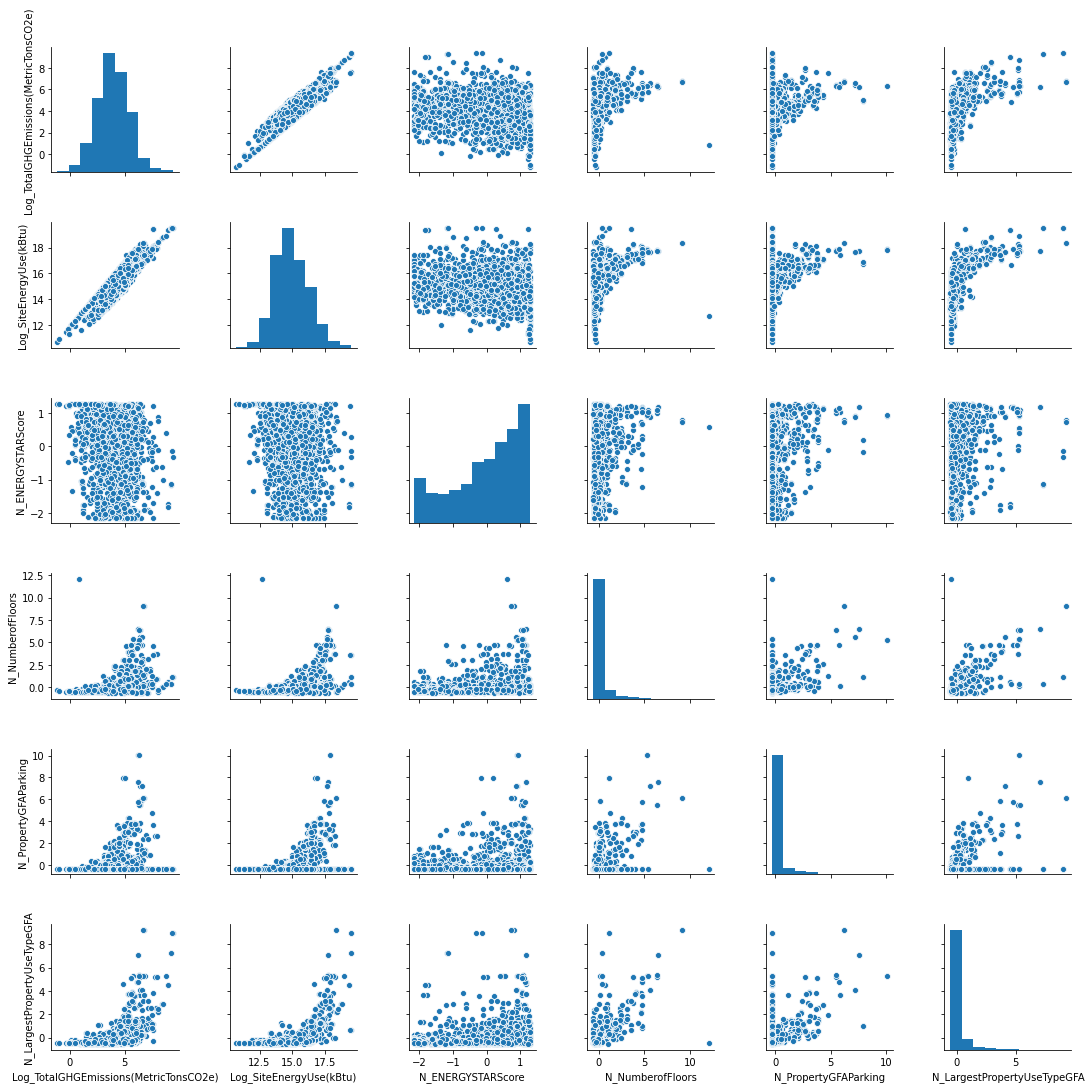

In [165]:
# pairplot # property
sns.pairplot(num_cols_training_with_energyscore[['Log_TotalGHGEmissions(MetricTonsCO2e)', 'Log_SiteEnergyUse(kBtu)', 'N_ENERGYSTARScore','N_NumberofFloors', 
                 'N_PropertyGFAParking','N_LargestPropertyUseTypeGFA']])

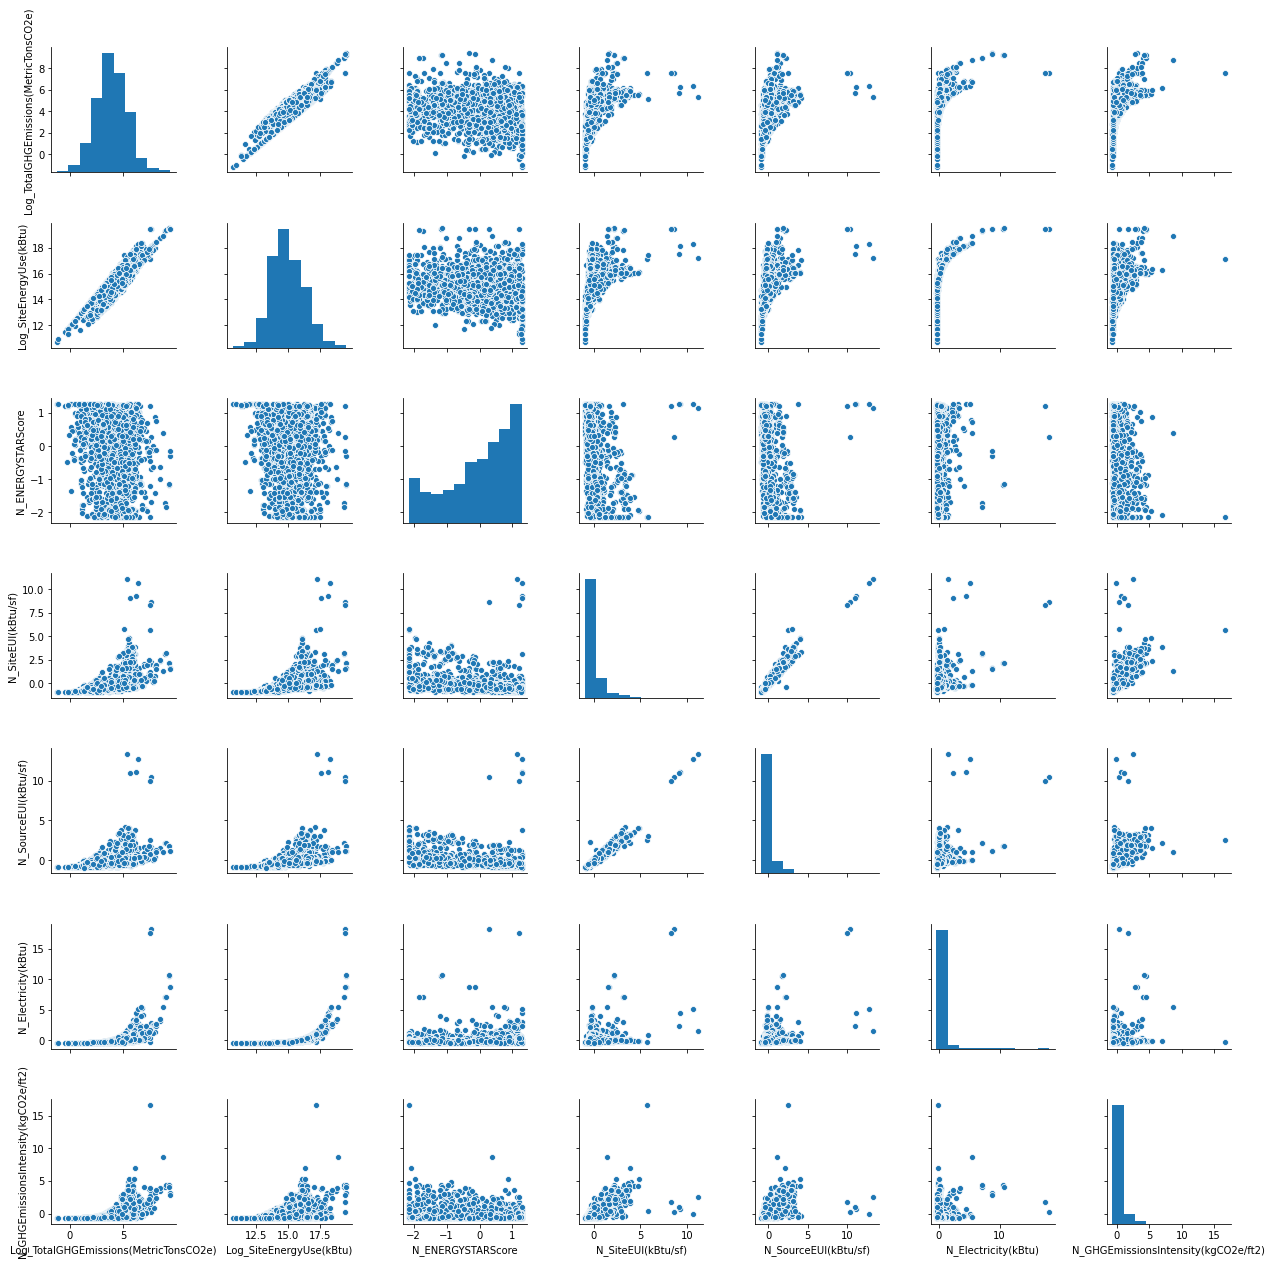

In [166]:
# pairplot # énergie (~ "forte corrélation")
sns.pairplot(num_cols_training_with_energyscore[['Log_TotalGHGEmissions(MetricTonsCO2e)', 'Log_SiteEnergyUse(kBtu)', 'N_ENERGYSTARScore','N_SiteEUI(kBtu/sf)', 
                 'N_SourceEUI(kBtu/sf)', 'N_Electricity(kBtu)', 'N_GHGEmissionsIntensity(kgCO2e/ft2)']])

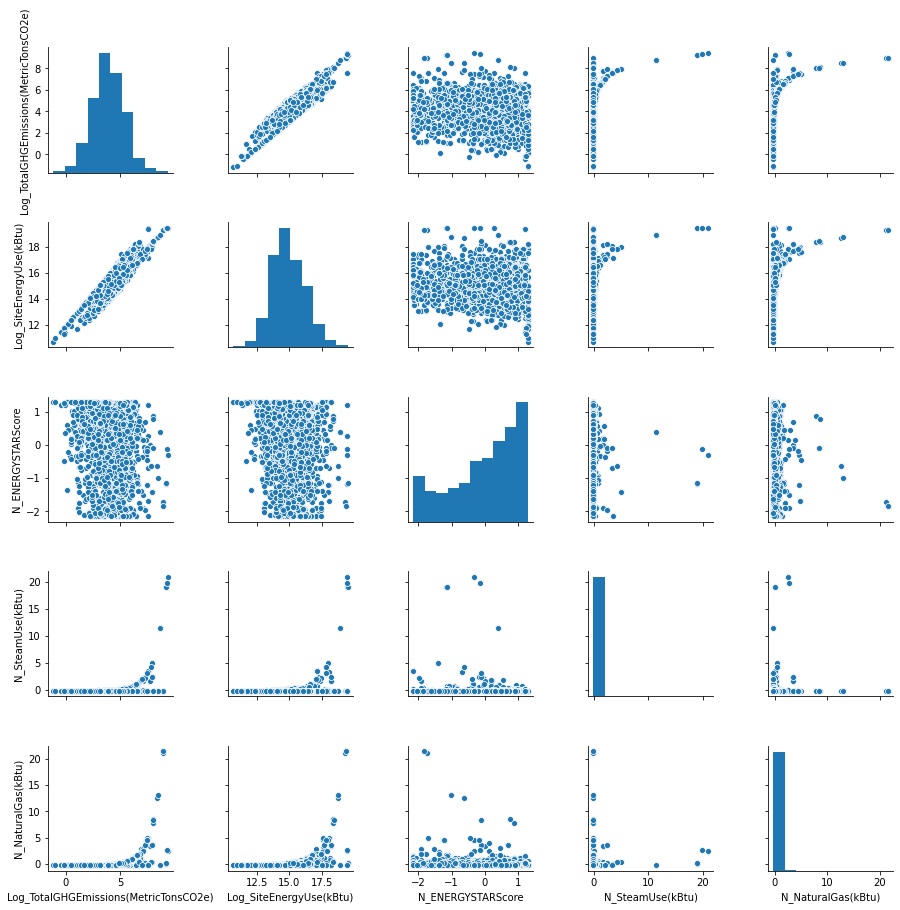

In [167]:
# pairplot # énergie ("faible corrélation")
sns.pairplot(num_cols_training_with_energyscore[['Log_TotalGHGEmissions(MetricTonsCO2e)', 'Log_SiteEnergyUse(kBtu)', 'N_ENERGYSTARScore','N_SteamUse(kBtu)', 'N_NaturalGas(kBtu)']])

## Matrice de corrélation

In [172]:
num_cols_training_with_energyscore.corr()

,Log_TotalGHGEmissions(MetricTonsCO2e),Log_SiteEnergyUse(kBtu),N_DataYear,N_YearBuilt,N_NumberofBuildings,N_NumberofFloors,N_PropertyGFATotal,N_PropertyGFAParking,N_PropertyGFABuilding(s),N_LargestPropertyUseTypeGFA,N_ENERGYSTARScore,N_SiteEUI(kBtu/sf),N_SourceEUI(kBtu/sf),N_SteamUse(kBtu),N_Electricity(kBtu),N_NaturalGas(kBtu),N_GHGEmissionsIntensity(kgCO2e/ft2),N_Latitude,N_Longitude
Log_TotalGHGEmissions(MetricTonsCO2e),1.000000,0.884821,0.015173,0.138542,0.154297,0.385098,0.512869,0.293926,0.516190,0.528458,-0.153969,0.517710,0.418527,0.259113,0.491774,0.417733,0.575670,0.064625,0.006726
Log_SiteEnergyUse(kBtu),0.884821,1.000000,0.010932,0.263060,0.138597,0.511665,0.650215,0.437878,0.637030,0.645020,-0.146102,0.532476,0.516694,0.234864,0.610442,0.363127,0.368400,0.064215,-0.011221
N_DataYear,0.015173,0.010932,1.000000,-0.002945,0.023458,0.004711,-0.002076,-0.015392,0.001697,0.000517,0.017334,0.004685,0.004026,0.003163,0.002348,0.005450,0.055040,0.015542,0.018815
N_YearBuilt,0.138542,0.263060,-0.002945,1.000000,0.040646,0.112329,0.224510,0.304981,0.178953,0.188039,-0.052882,0.138834,0.170286,0.021503,0.164924,0.040208,-0.037024,0.106356,-0.051205
N_NumberofBuildings,0.154297,0.138597,0.023458,0.040646,1.000000,0.008230,0.172452,-0.010916,0.202831,0.236848,-0.030150,0.112563,0.076291,0.406530,0.304874,0.385578,0.201412,0.036220,0.043376
N_NumberofFloors,0.385098,0.511665,0.004711,0.112329,0.008230,1.000000,0.751604,0.576560,0.717591,0.717506,0.159775,0.028748,0.064278,0.099495,0.501360,0.068263,-0.050208,-0.009156,-0.007095
N_PropertyGFATotal,0.512869,0.650215,-0.002076,0.224510,0.172452,0.751604,1.000000,0.671342,0.980280,0.951921,0.151123,0.056004,0.078864,0.327408,0.677453,0.263223,-0.002859,-0.022102,0.006553
N_PropertyGFAParking,0.293926,0.437878,-0.015392,0.304981,-0.010916,0.576560,0.671342,1.000000,0.511643,0.556129,0.124744,0.037260,0.083256,0.007855,0.337301,0.025735,-0.121057,0.020044,-0.029859
N_PropertyGFABuilding(s),0.516190,0.637030,0.001697,0.178953,0.202831,0.717591,0.980280,0.511643,1.000000,0.955263,0.141934,0.054989,0.069227,0.377464,0.695423,0.298287,0.028963,-0.030967,0.015558
N_LargestPropertyUseTypeGFA,0.528458,0.645020,0.000517,0.188039,0.236848,0.717506,0.951921,0.556129,0.955263,1.000000,0.137164,0.056184,0.063992,0.441351,0.705389,0.322035,0.071279,-0.027054,0.018223


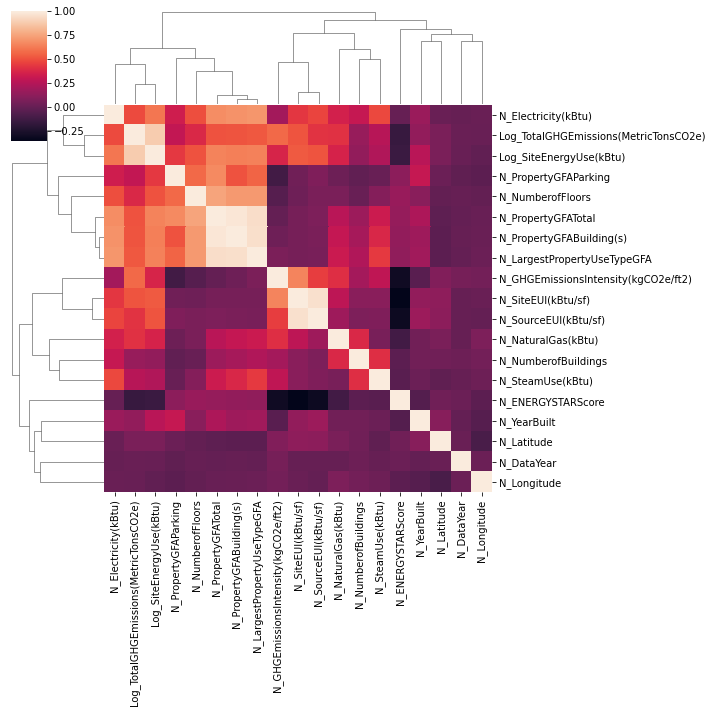

In [173]:
sns.clustermap(num_cols_training_with_energyscore.corr())

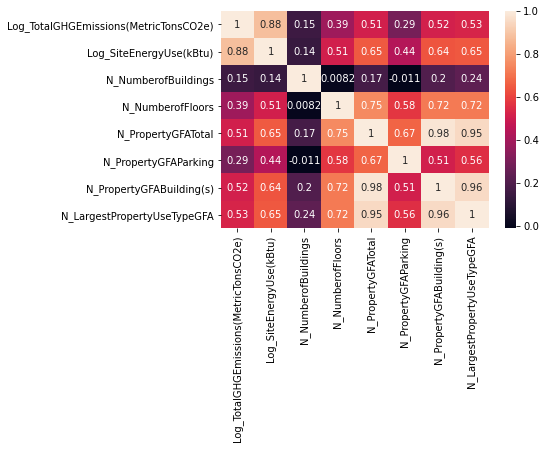

In [174]:
corrMatrix = num_cols_training_with_energyscore[['Log_TotalGHGEmissions(MetricTonsCO2e)', 'Log_SiteEnergyUse(kBtu)',
                                                 'N_NumberofBuildings', 'N_NumberofFloors','N_PropertyGFATotal', 
                                                 'N_PropertyGFAParking','N_PropertyGFABuilding(s)', 
                                                 'N_LargestPropertyUseTypeGFA']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show() # le faire par petit groupe # heatmap plus facile à interpréter que le clustermap

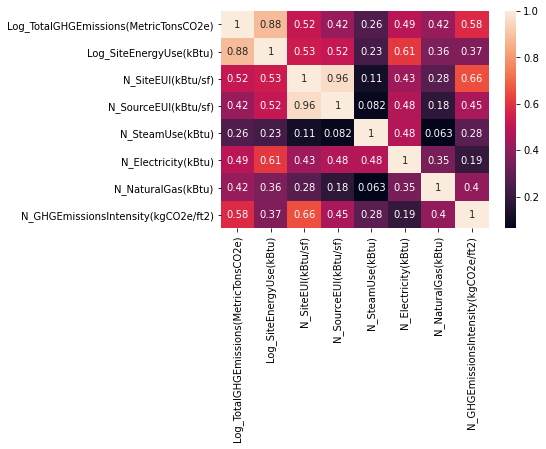

In [175]:
corrMatrix = num_cols_training_with_energyscore[['Log_TotalGHGEmissions(MetricTonsCO2e)', 'Log_SiteEnergyUse(kBtu)',
                                                 'N_SiteEUI(kBtu/sf)', 'N_SourceEUI(kBtu/sf)','N_SteamUse(kBtu)', 'N_Electricity(kBtu)', 
                                                 'N_NaturalGas(kBtu)','N_GHGEmissionsIntensity(kgCO2e/ft2)']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()                      

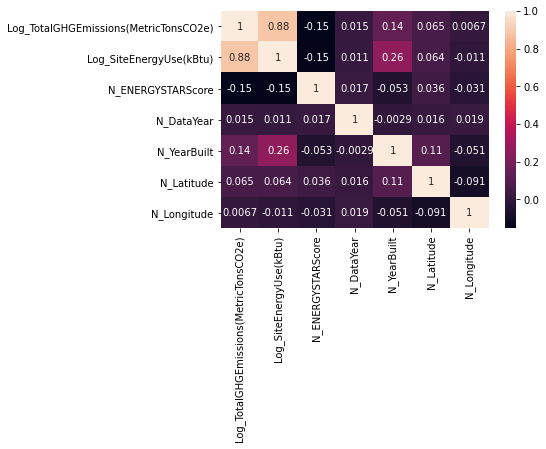

In [176]:
corrMatrix = num_cols_training_with_energyscore[['Log_TotalGHGEmissions(MetricTonsCO2e)', 'Log_SiteEnergyUse(kBtu)',
                                                 'N_ENERGYSTARScore', 'N_DataYear', 'N_YearBuilt', 'N_Latitude', 'N_Longitude']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()    

# One-hot-encoding

In [177]:
# liste de colonnes catégorielles pour la regression avec ENERGYSTARScore (cat_cols_training_with_energyscore)
cat_cols_training_with_energyscore = list_cols_training_with_energyscore[['LargestPropertyUseType', 'CouncilDistrictCode', 'ZipCode']]
cat_cols_training_with_energyscore.shape

(1827, 3)

In [178]:
print(cat_cols_training_with_energyscore['LargestPropertyUseType'])

0                            Hotel
1                            Hotel
1                            Hotel
2                            Hotel
3                            Hotel
                   ...            
3332     Supermarket/Grocery Store
3337                         Hotel
3338    Non-Refrigerated Warehouse
3339                        Office
3347                   K-12 School
Name: LargestPropertyUseType, Length: 1827, dtype: object


In [179]:
cat_cols_training_with_energyscore['LargestPropertyUseType'].value_counts()

Office                                   775
Non-Refrigerated Warehouse               268
Hotel                                    127
Worship Facility                         118
Retail Store                             116
Distribution Center                       76
Supermarket/Grocery Store                 71
K-12 School                               70
Medical Office                            68
Senior Care Community                     32
Residence Hall/Dormitory                  31
Hospital (General Medical & Surgical)     18
Parking                                   11
Refrigerated Warehouse                    10
Bank Branch                                8
Multifamily Housing                        7
Financial Office                           7
Data Center                                4
Other                                      2
Courthouse                                 2
Wholesale Club/Supercenter                 2
Other - Restaurant/Bar                     1
Laboratory

In [180]:
cat_cols_training_with_energyscore['LargestPropertyUseType'].value_counts().shape

(25,)

In [181]:
cat_cols_training_with_energyscore['CouncilDistrictCode'].value_counts()

7    646
2    415
4    203
3    194
5    132
1    120
6    117
Name: CouncilDistrictCode, dtype: int64

In [182]:
cat_cols_training_with_energyscore['CouncilDistrictCode'].value_counts().shape

(7,)

In [183]:
cat_cols_training_with_energyscore['ZipCode'].value_counts()

98134.0    200
98104.0    194
98101.0    187
98109.0    163
98108.0    143
98105.0    108
98121.0    104
98103.0     84
98122.0     80
98119.0     78
98133.0     62
98115.0     53
98107.0     53
98144.0     46
98125.0     40
98118.0     36
98106.0     34
98102.0     30
98126.0     26
98199.0     24
98116.0     20
98117.0     16
98112.0     15
98195.0      6
98136.0      4
98178.0      3
98146.0      2
98155.0      2
98168.0      2
98177.0      2
98033.0      1
98114.0      1
98020.0      1
98145.0      1
98154.0      1
98164.0      1
98165.0      1
98185.0      1
98191.0      1
98053.0      1
Name: ZipCode, dtype: int64

In [184]:
cat_cols_training_with_energyscore['ZipCode'].value_counts().shape

(40,)

In [185]:
pd.get_dummies(cat_cols_training_with_energyscore["LargestPropertyUseType"],prefix='LargestPropertyUseType',drop_first=True)

,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Parking,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3338,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3339,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [186]:
pd.get_dummies(cat_cols_training_with_energyscore["CouncilDistrictCode"],prefix='CouncilDistrictCode',drop_first=True)

,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7
0,0,0,0,0,0,1
1,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,1,0,0,0,0
...,...,...,...,...,...,...
3332,0,0,0,0,0,1
3337,0,0,1,0,0,0
3338,1,0,0,0,0,0
3339,1,0,0,0,0,0


In [187]:
pd.get_dummies(cat_cols_training_with_energyscore["ZipCode"],prefix='ZipCode',drop_first=True)

,ZipCode_98033.0,ZipCode_98053.0,ZipCode_98101.0,ZipCode_98102.0,ZipCode_98103.0,ZipCode_98104.0,ZipCode_98105.0,ZipCode_98106.0,ZipCode_98107.0,ZipCode_98108.0,ZipCode_98109.0,ZipCode_98112.0,ZipCode_98114.0,ZipCode_98115.0,ZipCode_98116.0,ZipCode_98117.0,ZipCode_98118.0,ZipCode_98119.0,ZipCode_98121.0,ZipCode_98122.0,ZipCode_98125.0,ZipCode_98126.0,ZipCode_98133.0,ZipCode_98134.0,ZipCode_98136.0,ZipCode_98144.0,ZipCode_98145.0,ZipCode_98146.0,ZipCode_98154.0,ZipCode_98155.0,ZipCode_98164.0,ZipCode_98165.0,ZipCode_98168.0,ZipCode_98177.0,ZipCode_98178.0,ZipCode_98185.0,ZipCode_98191.0,ZipCode_98195.0,ZipCode_98199.0
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3337,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3338,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3339,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [188]:
# ajouter des colonnes factices au dataframe
# LargestPropertyUseType
cat_cols_training_with_energyscore = pd.concat([cat_cols_training_with_energyscore,pd.get_dummies(cat_cols_training_with_energyscore['LargestPropertyUseType'], prefix='LargestPropertyUseType')],axis=1)
cat_cols_training_with_energyscore

,LargestPropertyUseType,CouncilDistrictCode,ZipCode,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Parking,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility
0,Hotel,7,98101.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hotel,2,98108.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hotel,7,98101.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hotel,7,98101.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Hotel,3,98109.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,Supermarket/Grocery Store,7,98119.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3337,Hotel,4,98103.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3338,Non-Refrigerated Warehouse,2,98108.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3339,Office,2,98108.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [189]:
# CouncilDistrictCode
cat_cols_training_with_energyscore = pd.concat([cat_cols_training_with_energyscore,pd.get_dummies(cat_cols_training_with_energyscore['CouncilDistrictCode'], prefix='CouncilDistrictCode')],axis=1)
cat_cols_training_with_energyscore

,LargestPropertyUseType,CouncilDistrictCode,ZipCode,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Parking,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7
0,Hotel,7,98101.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Hotel,2,98108.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Hotel,7,98101.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Hotel,7,98101.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Hotel,3,98109.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,Supermarket/Grocery Store,7,98119.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3337,Hotel,4,98103.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3338,Non-Refrigerated Warehouse,2,98108.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3339,Office,2,98108.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [190]:
# ZipCode
cat_cols_training_with_energyscore = pd.concat([cat_cols_training_with_energyscore,pd.get_dummies(cat_cols_training_with_energyscore['ZipCode'], prefix='ZipCode')],axis=1)
cat_cols_training_with_energyscore

,LargestPropertyUseType,CouncilDistrictCode,ZipCode,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Parking,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7,ZipCode_98020.0,ZipCode_98033.0,ZipCode_98053.0,ZipCode_98101.0,ZipCode_98102.0,ZipCode_98103.0,ZipCode_98104.0,ZipCode_98105.0,ZipCode_98106.0,ZipCode_98107.0,ZipCode_98108.0,ZipCode_98109.0,ZipCode_98112.0,ZipCode_98114.0,ZipCode_98115.0,ZipCode_98116.0,ZipCode_98117.0,ZipCode_98118.0,ZipCode_98119.0,ZipCode_98121.0,ZipCode_98122.0,ZipCode_98125.0,ZipCode_98126.0,ZipCode_98133.0,ZipCode_98134.0,ZipCode_98136.0,ZipCode_98144.0,ZipCode_98145.0,ZipCode_98146.0,ZipCode_98154.0,ZipCode_98155.0,ZipCode_98164.0,ZipCode_98165.0,ZipCode_98168.0,ZipCode_98177.0,ZipCode_98178.0,ZipCode_98185.0,ZipCode_98191.0,ZipCode_98195.0,ZipCode_98199.0
0,Hotel,7,98101.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hotel,2,98108.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hotel,7,98101.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hotel,7,98101.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Hotel,3,98109.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,Supermarket/Grocery Store,7,98119.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3337,Hotel,4,98103.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3338,Non-Refrigerated Warehouse,2,98108.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3339,Office,2,98108.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [191]:
# supprimer les colonnes originales LargestPropertyUseType, CouncilDistrictCode, ZipCode
cat_cols_training_with_energyscore = cat_cols_training_with_energyscore.drop(['LargestPropertyUseType', 'CouncilDistrictCode', 'ZipCode'],1)
cat_cols_training_with_energyscore

,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Parking,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7,ZipCode_98020.0,ZipCode_98033.0,ZipCode_98053.0,ZipCode_98101.0,ZipCode_98102.0,ZipCode_98103.0,ZipCode_98104.0,ZipCode_98105.0,ZipCode_98106.0,ZipCode_98107.0,ZipCode_98108.0,ZipCode_98109.0,ZipCode_98112.0,ZipCode_98114.0,ZipCode_98115.0,ZipCode_98116.0,ZipCode_98117.0,ZipCode_98118.0,ZipCode_98119.0,ZipCode_98121.0,ZipCode_98122.0,ZipCode_98125.0,ZipCode_98126.0,ZipCode_98133.0,ZipCode_98134.0,ZipCode_98136.0,ZipCode_98144.0,ZipCode_98145.0,ZipCode_98146.0,ZipCode_98154.0,ZipCode_98155.0,ZipCode_98164.0,ZipCode_98165.0,ZipCode_98168.0,ZipCode_98177.0,ZipCode_98178.0,ZipCode_98185.0,ZipCode_98191.0,ZipCode_98195.0,ZipCode_98199.0
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3337,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3338,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3339,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [192]:
df = pd.concat([cat_cols_training_with_energyscore, num_cols_training_with_energyscore], axis = 1)
df

,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Parking,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7,ZipCode_98020.0,ZipCode_98033.0,ZipCode_98053.0,ZipCode_98101.0,ZipCode_98102.0,ZipCode_98103.0,ZipCode_98104.0,ZipCode_98105.0,ZipCode_98106.0,ZipCode_98107.0,ZipCode_98108.0,ZipCode_98109.0,ZipCode_98112.0,ZipCode_98114.0,ZipCode_98115.0,ZipCode_98116.0,ZipCode_98117.0,ZipCode_98118.0,ZipCode_98119.0,ZipCode_98121.0,ZipCode_98122.0,ZipCode_98125.0,ZipCode_98126.0,ZipCode_98133.0,ZipCode_98134.0,ZipCode_98136.0,ZipCode_98144.0,ZipCode_98145.0,ZipCode_98146.0,ZipCode_98154.0,ZipCode_98155.0,ZipCode_98164.0,ZipCode_98165.0,ZipCode_98168.0,ZipCode_98177.0,ZipCode_98178.0,ZipCode_98185.0,ZipCode_98191.0,ZipCode_98195.0,ZipCode_98199.0,Log_TotalGHGEmissions(MetricTonsCO2e),Log_SiteEnergyUse(kBtu),N_DataYear,N_YearBuilt,N_NumberofBuildings,N_NumberofFloors,N_PropertyGFATotal,N_PropertyGFAParking,N_PropertyGFABuilding(s),N_LargestPropertyUseTypeGFA,N_ENERGYSTARScore,N_SiteEUI(kBtu/sf),N_SourceEUI(kBtu/sf),N_SteamUse(kBtu),N_Electricity(kBtu),N_NaturalGas(kBtu),N_GHGEmissionsIntensity(kgCO2e/ft2),N_Latitude,N_Longitude
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.521381,15.793246,0.937629,-1.122742,-0.028173,0.886874,-0.190930,-0.353014,-0.127217,-0.096419,-0.103723,0.196071,0.054344,0.219041,-0.141232,-0.058345,0.860166,-0.074459,-0.174070
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.800197,14.118735,-1.065936,0.908910,-0.028173,-0.269120,-0.500332,-0.353014,-0.485901,-0.482392,0.519523,-0.114544,-0.296559,-0.092401,-0.359980,-0.138682,0.333919,-1.449103,0.594293
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.689886,15.942305,0.937629,1.033934,-0.028173,0.758430,-0.119973,-0.045888,-0.126847,-0.123058,-0.069098,0.386213,0.019417,-0.092401,-0.187064,0.548546,0.876785,-0.053775,0.007263
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.644575,18.100297,0.937629,0.190018,-0.028173,4.611743,3.877769,3.657684,3.520171,3.811508,-0.692344,0.403631,0.378506,3.259460,2.829647,-0.024249,0.505642,-0.037569,-0.178983
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.232802,16.750916,-1.065936,0.846397,-0.028173,0.244655,0.720785,0.559678,0.686365,0.765554,-0.796218,0.169944,0.030332,-0.092401,0.294992,1.026343,0.200972,0.227468,0.042950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [193]:
df.to_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P4_OC\P4_Donnees\2015_2016_Building_Energy_Benchmarking.csv", index=False)